# Fine-tuning CLIP for collapsed building remote sensing image search

## Install dependecies

In [2]:
# !pip install -U "finetuner[full]" # finetuner-full will install ML libraries such as torchvision and transformers
# !pip install git+https://github.com/openai/CLIP.git

In [3]:
!pip show finetuner

Name: finetuner
Version: 0.8.1
Summary: Task-oriented finetuning for better embeddings on neural search.
Home-page: https://github.com/jina-ai/finetuner/
Author: Jina AI
Author-email: hello@jina.ai
License: Apache 2.0
Location: e:\ilovestudy\bgd\clipfintuner\venv\lib\site-packages
Requires: finetuner-stubs, finetuner-commons, docarray
Required-by: 


## Data

- healthy building (2080 remote sensing images of before earthquake)
- collapsed building (500 remote sensing images images of collapsed building)
- validation images (2080 remote sensing images of after earthquake)


### Load data

In [14]:
from docarray import Document, DocumentArray

da_train = DocumentArray.from_files('./dataset/*/*.*')
da_val = DocumentArray.from_files('./data/after_png/*.*')

def assign_labels(d: Document):
    # print('uri',d.uri)
    d.tags['finetuner_label'] = d.uri.split('\\')[1]
    print("tag",d.tags['finetuner_label'])
    return d

da_train.apply(assign_labels, show_progress=True)
da_val.apply(assign_labels, show_progress=True)

# shuffle and train-test-split to 50-50
da_train = da_train.shuffle()
train_da = da_train[:]
# test_da = da_train[120:]
valid_da = da_val[:]

Output()

uri ./dataset\collapsed building\after_1120_10304_343.png

tag collapsed building

uri ./dataset\collapsed building\after_1120_448_769.png

tag collapsed building

uri ./dataset\collapsed building\after_1120_6048_562.png

tag collapsed building

uri ./dataset\collapsed building\after_1120_6048_567.png

tag collapsed building

uri ./dataset\collapsed building\after_1120_8064_783.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_1792_22.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_2016_11.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_5152_742.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_5152_744.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_5376_743.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_7392_501.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_9184_296.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_9632_324.png

uri ./dataset\collapsed building\after_1568_3136_760.png

uri ./dataset\collapsed building\after_1568_2912_745.png

tag collapsed building

uri ./dataset\collapsed building\after_1344_9856_2.png

uri ./dataset\collapsed building\after_1568_3136_761.png

tag collapsed building

uri ./dataset\collapsed building\after_1568_5824_563.png

tag collapsed building

uri ./dataset\collapsed building\after_1568_5824_568.png

uri ./dataset\collapsed building\after_1568_6048_510.png

tag collapsed building

uri ./dataset\collapsed building\after_1568_5824_564.png

uri ./dataset\collapsed building\after_1792_4704_716.png

uri ./dataset\collapsed building\after_1792_5600_751.png

uri ./dataset\collapsed building\after_1792_6272_500.png

uri ./dataset\collapsed building\after_1792_672_308.png

tag collapsed building

uri ./dataset\collapsed building\after_1792_7616_584.png

uri ./dataset\collapsed building\after_1792_7616_588.png

tag collapsed building

uri ./dataset\collapsed building\after_1792_10304_3.png

uri ./dataset\collapsed building\after_1792_896_309.png

uri ./dataset\collapsed building\after_1792_224_300.png

uri ./dataset\collapsed building\after_2016_12096_293.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2016_3360_740.png

tag collapsed building

uri ./dataset\collapsed building\after_2016_10528_278.png

uri ./dataset\collapsed building\after_2016_3360_788.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2016_4032_758.png

uri ./dataset\collapsed building\after_2016_6048_560.png

uri ./dataset\collapsed building\after_2016_4256_757.png

uri ./dataset\collapsed building\after_2016_4256_767.png

uri ./dataset\collapsed building\after_2016_4704_746.png

tag collapsed building

uri ./dataset\collapsed building\after_2016_4704_750.png

uri ./dataset\collapsed building\after_2016_4704_752.png

uri ./dataset\collapsed building\after_2016_5824_566.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2016_6272_497.png

uri ./dataset\collapsed building\after_2016_6944_403.png

uri ./dataset\collapsed building\after_2016_7616_369.png

uri ./dataset\collapsed building\after_2016_5824_559.png

tag collapsed building

uri ./dataset\collapsed building\after_2016_7616_587.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2016_7616_571.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_1792_268.png

uri ./dataset\collapsed building\after_2464_2016_257.png

uri ./dataset\collapsed building\after_2464_2016_799.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_2240_258.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_2464_263.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_3808_322.png

uri ./dataset\collapsed building\after_2464_4256_738.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_3360_331.png

uri ./dataset\collapsed building\after_2464_3808_323.png

uri ./dataset\collapsed building\after_2464_3808_334.png

uri ./dataset\collapsed building\after_2464_2464_254.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_4256_764.png

uri ./dataset\collapsed building\after_2464_5824_717.png

uri ./dataset\collapsed building\after_2464_6048_446.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_4704_777.png

uri ./dataset\collapsed building\after_2464_4928_792.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_6048_553.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_6048_552.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_6496_294.png

uri ./dataset\collapsed building\after_2464_6496_425.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_6944_290.png

uri ./dataset\collapsed building\after_2464_7840_58.png

uri ./dataset\collapsed building\after_2464_4704_776.png

uri ./dataset\collapsed building\after_2464_6720_287.png

uri ./dataset\collapsed building\after_2464_7840_59.png

uri ./dataset\collapsed building\after_2464_6944_132.png

uri ./dataset\collapsed building\after_2464_8064_33.png

uri ./dataset\collapsed building\after_2464_6944_173.png

uri ./dataset\collapsed building\after_2464_6944_207.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_7840_823.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_6944_827.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_10080_32.png

uri ./dataset\collapsed building\after_2688_10304_98.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_8064_49.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_8736_43.png

tag collapsed building

uri ./dataset\collapsed building\after_2464_9184_95.png

uri ./dataset\collapsed building\after_2464_8064_37.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_12992_124.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2464_9632_346.png

uri ./dataset\collapsed building\after_2688_12096_9.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_2240_255.png

uri ./dataset\collapsed building\after_2688_14336_127.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_2240_250.png

uri ./dataset\collapsed building\after_2688_11200_807.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_1344_267.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_2240_260.png

uri ./dataset\collapsed building\after_2688_14336_850.png

uri ./dataset\collapsed building\after_2688_2240_261.png

uri ./dataset\collapsed building\after_2688_3136_348.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_2912_318.png

uri ./dataset\collapsed building\after_2688_3808_345.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_3584_336.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_4256_766.png

uri ./dataset\collapsed building\after_2688_2464_251.png

uri ./dataset\collapsed building\after_2688_4032_347.png

uri ./dataset\collapsed building\after_2688_4032_791.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_5376_768.png

uri ./dataset\collapsed building\after_2688_4032_305.png

uri ./dataset\collapsed building\after_2688_4256_739.png

uri ./dataset\collapsed building\after_2688_4256_765.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_4928_772.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_4928_787.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2688_5824_718.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_1792_5.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_3584_338.png

tag collapsed building

uri ./dataset\collapsed building\after_2688_9408_19.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_4032_339.png

uri ./dataset\collapsed building\after_2912_1120_249.png

uri ./dataset\collapsed building\after_2912_4480_781.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_3808_312.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_448_97.png

uri ./dataset\collapsed building\after_2912_5600_109.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_4928_785.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_4928_786.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_5152_779.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_4704_784.png

uri ./dataset\collapsed building\after_2912_5600_773.png

uri ./dataset\collapsed building\after_2912_5824_114.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_6048_121.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_6048_126.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_6048_125.png

uri ./dataset\collapsed building\after_2912_6496_154.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_6048_130.png

uri ./dataset\collapsed building\after_2912_6944_846.png

uri ./dataset\collapsed building\after_2912_6048_211.png

uri ./dataset\collapsed building\after_2912_6272_128.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_6272_66.png

uri ./dataset\collapsed building\after_2912_7168_143.png

uri ./dataset\collapsed building\after_2912_6272_835.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_6944_828.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_6048_213.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_6944_217.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_7168_216.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_7616_14.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_7392_136.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_7840_40.png

uri ./dataset\collapsed building\after_2912_7616_137.png

uri ./dataset\collapsed building\after_2912_6048_60.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_2912_896_6.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_9408_226.png

uri ./dataset\collapsed building\after_2912_9408_42.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_10304_275.png

uri ./dataset\collapsed building\after_3136_10976_808.png

uri ./dataset\collapsed building\after_3136_10976_86.png

tag collapsed building

uri ./dataset\collapsed building\after_2912_8960_400.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_1568_335.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_3136_244.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_2464_247.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_2464_248.png

uri ./dataset\collapsed building\after_3136_1568_337.png

uri ./dataset\collapsed building\after_3136_2464_253.png

uri ./dataset\collapsed building\after_3136_1792_344.png

uri ./dataset\collapsed building\after_3136_2464_246.png

uri ./dataset\collapsed building\after_3136_3360_332.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_448_100.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_4704_155.png

uri ./dataset\collapsed building\after_3136_4704_314.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_4928_780.png

uri ./dataset\collapsed building\after_3136_5376_192.png

uri ./dataset\collapsed building\after_3136_5152_782.png

uri ./dataset\collapsed building\after_3136_5376_188.png

uri ./dataset\collapsed building\after_3136_5376_814.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_5600_119.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_5600_110.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_5824_120.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3136_5824_129.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_6272_826.png

tag collapsed building

uri ./dataset\collapsed building\after_3136_6496_811.png

uri ./dataset\collapsed building\after_3136_7392_112.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_2912_327.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_1568_358.png

uri ./dataset\collapsed building\after_3360_10304_92.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_2912_236.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_3808_307.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_3136_800.png

uri ./dataset\collapsed building\after_3360_3808_306.png

uri ./dataset\collapsed building\after_3360_2464_238.png

uri ./dataset\collapsed building\after_3360_4256_815.png

uri ./dataset\collapsed building\after_3360_448_340.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_3808_53.png

uri ./dataset\collapsed building\after_3360_4032_8.png

uri ./dataset\collapsed building\after_3360_4256_177.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_3808_325.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_4928_142.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_4928_836.png

uri ./dataset\collapsed building\after_3360_5376_180.png

uri ./dataset\collapsed building\after_3360_4928_523.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_5824_116.png

uri ./dataset\collapsed building\after_3360_4704_151.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_4928_147.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_5376_183.png

uri ./dataset\collapsed building\after_3360_5376_195.png

uri ./dataset\collapsed building\after_3360_5600_163.png

uri ./dataset\collapsed building\after_3360_5152_172.png

uri ./dataset\collapsed building\after_3360_6048_113.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_5600_813.png

uri ./dataset\collapsed building\after_3360_6048_108.png

uri ./dataset\collapsed building\after_3360_5824_196.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6272_107.png

uri ./dataset\collapsed building\after_3360_6272_839.png

uri ./dataset\collapsed building\after_3360_6272_841.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6048_138.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6272_135.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6272_837.png

uri ./dataset\collapsed building\after_3360_5824_838.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6272_842.png

uri ./dataset\collapsed building\after_3360_6496_164.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_167.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_178.png

uri ./dataset\collapsed building\after_3360_6496_181.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_182.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6720_117.png

uri ./dataset\collapsed building\after_3360_6496_184.png

uri ./dataset\collapsed building\after_3360_6496_189.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_222.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_844.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6720_212.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6496_194.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6944_131.png

uri ./dataset\collapsed building\after_3360_6944_203.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_7392_830.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6720_219.png

uri ./dataset\collapsed building\after_3360_672_99.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_7392_840.png

uri ./dataset\collapsed building\after_3360_7392_847.png

uri ./dataset\collapsed building\after_3360_6944_209.png

uri ./dataset\collapsed building\after_3360_7392_0.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_6720_218.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_6720_118.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_7616_379.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_7840_380.png

uri ./dataset\collapsed building\after_3360_8064_454.png

uri ./dataset\collapsed building\after_3360_7840_464.png

uri ./dataset\collapsed building\after_3360_6944_206.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_7392_851.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_8064_398.png

tag collapsed building

uri ./dataset\collapsed building\after_3360_8064_453.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_9184_499.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_10080_686.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3360_8288_460.png

uri ./dataset\collapsed building\after_3360_9408_569.png

uri ./dataset\collapsed building\after_3584_10752_89.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_0_482.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_1568_350.png

uri ./dataset\collapsed building\after_3584_2016_353.png

uri ./dataset\collapsed building\after_3584_10752_637.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_1120_524.png

uri ./dataset\collapsed building\after_3584_2240_360.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_2240_361.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_6272_843.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_6272_833.png

uri ./dataset\collapsed building\after_3584_4928_538.png

uri ./dataset\collapsed building\after_3584_672_455.png

uri ./dataset\collapsed building\after_3584_6496_845.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_672_245.png

uri ./dataset\collapsed building\after_3584_5152_537.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_6272_852.png

uri ./dataset\collapsed building\after_3584_672_252.png

uri ./dataset\collapsed building\after_3584_672_549.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_6944_418.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_7168_481.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_6944_420.png

uri ./dataset\collapsed building\after_3584_6944_442.png

uri ./dataset\collapsed building\after_3584_7168_478.png

uri ./dataset\collapsed building\after_3584_7616_225.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_5600_176.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_7168_480.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_8064_46.png

uri ./dataset\collapsed building\after_3584_8512_23.png

uri ./dataset\collapsed building\after_3584_896_381.png

uri ./dataset\collapsed building\after_3584_7392_401.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3584_9856_649.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_10080_646.png

uri ./dataset\collapsed building\after_3808_1344_399.png

uri ./dataset\collapsed building\after_3808_10080_647.png

uri ./dataset\collapsed building\after_3808_10304_687.png

tag collapsed building

uri ./dataset\collapsed building\after_3584_896_554.png

uri ./dataset\collapsed building\after_3808_10752_715.png

uri ./dataset\collapsed building\after_3584_9632_645.png

uri ./dataset\collapsed building\after_3808_1568_434.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_1792_356.png

uri ./dataset\collapsed building\after_3808_1792_393.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_1792_445.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_1792_357.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_1568_550.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2240_7.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2016_352.png

uri ./dataset\collapsed building\after_3808_2912_241.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_1792_431.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2016_320.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2464_328.png

uri ./dataset\collapsed building\after_3808_2464_330.png

uri ./dataset\collapsed building\after_3808_2016_351.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2912_233.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2016_440.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_2912_242.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_3136_471.png

uri ./dataset\collapsed building\after_3808_2912_298.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_3136_240.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_2912_243.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_3136_235.png

uri ./dataset\collapsed building\after_3808_3136_816.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_3360_477.png

uri ./dataset\collapsed building\after_3808_3136_297.png

uri ./dataset\collapsed building\after_3808_3584_475.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_3808_561.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_4032_488.png

uri ./dataset\collapsed building\after_3808_3360_469.png

uri ./dataset\collapsed building\after_3808_4032_572.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_4480_518.png

uri ./dataset\collapsed building\after_3808_4704_427.png

uri ./dataset\collapsed building\after_3808_4704_531.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_4928_389.png

uri ./dataset\collapsed building\after_3808_448_493.png

uri ./dataset\collapsed building\after_3808_4704_436.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_4704_437.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_448_494.png

uri ./dataset\collapsed building\after_3808_4928_413.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_4704_429.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_5152_526.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_5376_525.png

uri ./dataset\collapsed building\after_3808_8064_56.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_8512_680.png

uri ./dataset\collapsed building\after_3808_7616_161.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_7616_69.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_1568_391.png

tag collapsed building

uri ./dataset\collapsed building\after_3808_9184_674.png

uri ./dataset\collapsed building\after_3808_8064_79.png

uri ./dataset\collapsed building\after_4032_1568_462.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_3808_896_542.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_1568_452.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_2016_395.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_2016_415.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_1568_557.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_2016_421.png

uri ./dataset\collapsed building\after_4032_2016_539.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_2240_513.png

uri ./dataset\collapsed building\after_4032_2016_419.png

uri ./dataset\collapsed building\after_4032_3584_476.png

uri ./dataset\collapsed building\after_4032_2464_466.png

uri ./dataset\collapsed building\after_4032_2688_234.png

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_3808_479.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_3584_472.png

uri ./dataset\collapsed building\after_4032_3584_474.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_2688_467.png

uri ./dataset\collapsed building\after_4032_3584_704.png

uri ./dataset\collapsed building\after_4032_3808_700.png

uri ./dataset\collapsed building\after_4032_3584_470.png

uri ./dataset\collapsed building\after_4032_3808_711.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_3584_703.png

uri ./dataset\collapsed building\after_4032_4256_483.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_3808_706.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_4032_4256_679.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_5152_633.png

uri ./dataset\collapsed building\after_4032_4256_696.png

uri ./dataset\collapsed building\after_4032_5376_741.png

uri ./dataset\collapsed building\after_4032_4256_701.png

uri ./dataset\collapsed building\after_4032_4480_685.png

uri ./dataset\collapsed building\after_4032_6048_719.png

uri ./dataset\collapsed building\after_4032_4928_641.png

uri ./dataset\collapsed building\after_448_6944_473.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_5152_643.png

uri ./dataset\collapsed building\after_4032_4256_699.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_5376_756.png

uri ./dataset\collapsed building\after_4032_5600_735.png

tag collapsed building

uri ./dataset\collapsed building\after_4032_6048_721.png

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\collapsed building\after_672_896_774.png

tag collapsed building

uri ./dataset\collapsed building\after_672_9632_770.png

tag collapsed building

uri ./dataset\collapsed building\after_896_9632_311.png

tag collapsed building

uri ./dataset\healthy building\before_0_10304.png

tag collapsed building

tag collapsed building

tag collapsed building

tag collapsed building

uri ./dataset\healthy building\before_0_10528.png

tag collapsed building

uri ./dataset\healthy building\before_0_10080.png

tag collapsed building

tag collapsed building

uri ./dataset\healthy building\before_0_10752.png

uri ./dataset\healthy building\before_0_10976.png

uri ./dataset\healthy building\before_0_11200.png

tag collapsed building

tag collapsed building

uri ./dataset\healthy building\before_0_11648.png

uri ./dataset\healthy building\before_0_12096.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_12320.png

uri ./dataset\healthy building\before_0_0.png

tag healthy building

uri ./dataset\healthy building\before_0_11872.png

uri ./dataset\collapsed building\after_672_9184_778.png

tag healthy building

uri ./dataset\healthy building\before_0_1120.png

tag collapsed building

uri ./dataset\healthy building\before_0_12992.png

uri ./dataset\healthy building\before_0_11424.png

tag healthy building

uri ./dataset\healthy building\before_0_13216.png

tag healthy building

tag healthy building

tag collapsed building

uri ./dataset\healthy building\before_0_12768.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_12544.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_14336.png

uri ./dataset\healthy building\before_0_1568.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_13664.png

tag healthy building

uri ./dataset\healthy building\before_0_13888.png

uri ./dataset\healthy building\before_0_14112.png

uri ./dataset\healthy building\before_0_1344.png

tag healthy building

uri ./dataset\healthy building\before_0_13440.png

uri ./dataset\healthy building\before_0_2688.png

tag healthy building

uri ./dataset\healthy building\before_0_2016.png

uri ./dataset\healthy building\before_0_224.png

tag healthy building

uri ./dataset\healthy building\before_0_3136.png

uri ./dataset\healthy building\before_0_1792.png

uri ./dataset\healthy building\before_0_3360.png

tag healthy building

uri ./dataset\healthy building\before_0_4480.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_5376.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_4704.png

tag healthy building

uri ./dataset\healthy building\before_0_5600.png

tag healthy building

uri ./dataset\healthy building\before_0_4928.png

uri ./dataset\healthy building\before_0_5152.png

uri ./dataset\healthy building\before_0_3808.png

tag healthy building

uri ./dataset\healthy building\before_0_6496.png

tag healthy building

uri ./dataset\healthy building\before_0_448.png

uri ./dataset\healthy building\before_0_6944.png

tag healthy building

uri ./dataset\healthy building\before_0_5824.png

uri ./dataset\healthy building\before_0_6048.png

tag healthy building

uri ./dataset\healthy building\before_0_7392.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_6272.png

uri ./dataset\healthy building\before_0_7168.png

uri ./dataset\healthy building\before_0_672.png

tag healthy building

uri ./dataset\healthy building\before_0_7840.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_7616.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_8512.png

uri ./dataset\healthy building\before_0_6720.png

tag healthy building

uri ./dataset\healthy building\before_0_8064.png

uri ./dataset\healthy building\before_0_8288.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_8736.png

tag healthy building

uri ./dataset\healthy building\before_0_896.png

tag healthy building

uri ./dataset\healthy building\before_0_9184.png

tag healthy building

uri ./dataset\healthy building\before_0_9408.png

uri ./dataset\healthy building\before_0_9632.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_0.png

tag healthy building

uri ./dataset\healthy building\before_1120_10304.png

uri ./dataset\healthy building\before_0_8960.png

tag healthy building

uri ./dataset\healthy building\before_1120_10752.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_0_9856.png

tag healthy building

uri ./dataset\healthy building\before_1120_10528.png

tag healthy building

uri ./dataset\healthy building\before_1120_11424.png

tag healthy building

uri ./dataset\healthy building\before_1120_11648.png

uri ./dataset\healthy building\before_1120_10080.png

tag healthy building

uri ./dataset\healthy building\before_1120_11200.png

tag healthy building

uri ./dataset\healthy building\before_1120_12096.png

tag healthy building

uri ./dataset\healthy building\before_1120_1120.png

tag healthy building

uri ./dataset\healthy building\before_1120_11872.png

tag healthy building

uri ./dataset\healthy building\before_1120_12992.png

tag healthy building

uri ./dataset\healthy building\before_1120_12320.png

tag healthy building

uri ./dataset\healthy building\before_1120_10976.png

uri ./dataset\healthy building\before_1120_12544.png

uri ./dataset\healthy building\before_1120_1344.png

tag healthy building

uri ./dataset\healthy building\before_1120_13440.png

tag healthy building

uri ./dataset\healthy building\before_1120_13664.png

uri ./dataset\healthy building\before_1120_13888.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_12768.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_13216.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_1568.png

tag healthy building

uri ./dataset\healthy building\before_1120_2016.png

tag healthy building

uri ./dataset\healthy building\before_1120_2240.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_1792.png

tag healthy building

uri ./dataset\healthy building\before_1120_14112.png

uri ./dataset\healthy building\before_1120_224.png

uri ./dataset\healthy building\before_1120_14336.png

uri ./dataset\healthy building\before_1120_3584.png

tag healthy building

uri ./dataset\healthy building\before_1120_2464.png

uri ./dataset\healthy building\before_1120_2688.png

uri ./dataset\healthy building\before_1120_2912.png

tag healthy building

uri ./dataset\healthy building\before_1120_3136.png

tag healthy building

uri ./dataset\healthy building\before_1120_3360.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_3808.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_448.png

tag healthy building

uri ./dataset\healthy building\before_1120_4032.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_4704.png

tag healthy building

uri ./dataset\healthy building\before_1120_4256.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1120_6272.png

tag healthy building

uri ./dataset\healthy building\before_1120_5152.png

uri ./dataset\healthy building\before_1120_5376.png

uri ./dataset\healthy building\before_1120_5600.png

tag healthy building

uri ./dataset\healthy building\before_1120_4480.png

uri ./dataset\healthy building\before_1120_5824.png

tag healthy building

uri ./dataset\healthy building\before_1344_10752.png

tag healthy building

uri ./dataset\healthy building\before_1344_11872.png

uri ./dataset\healthy building\before_1344_10080.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_11424.png

tag healthy building

uri ./dataset\healthy building\before_1344_12544.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_13440.png

uri ./dataset\healthy building\before_1344_13664.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_13216.png

tag healthy building

uri ./dataset\healthy building\before_1344_1344.png

uri ./dataset\healthy building\before_1344_12768.png

tag healthy building

uri ./dataset\healthy building\before_1344_14112.png

tag healthy building

uri ./dataset\healthy building\before_1344_14336.png

tag healthy building

uri ./dataset\healthy building\before_1344_1568.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_13888.png

uri ./dataset\healthy building\before_1344_12992.png

uri ./dataset\healthy building\before_1344_2016.png

uri ./dataset\healthy building\before_1344_224.png

tag healthy building

uri ./dataset\healthy building\before_1344_2240.png

tag healthy building

uri ./dataset\healthy building\before_1344_1792.png

tag healthy building

uri ./dataset\healthy building\before_1344_3360.png

uri ./dataset\healthy building\before_1344_2464.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_2688.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_3136.png

uri ./dataset\healthy building\before_1344_4032.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_448.png

tag healthy building

uri ./dataset\healthy building\before_1344_3808.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_5152.png

uri ./dataset\healthy building\before_1344_3584.png

tag healthy building

uri ./dataset\healthy building\before_1344_4480.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_5824.png

tag healthy building

uri ./dataset\healthy building\before_1344_4256.png

uri ./dataset\healthy building\before_1344_5376.png

uri ./dataset\healthy building\before_1344_4704.png

uri ./dataset\healthy building\before_1344_6272.png

uri ./dataset\healthy building\before_1344_6720.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_2912.png

uri ./dataset\healthy building\before_1344_6048.png

tag healthy building

uri ./dataset\healthy building\before_1344_5600.png

uri ./dataset\healthy building\before_1344_6496.png

uri ./dataset\healthy building\before_1344_672.png

uri ./dataset\healthy building\before_1344_4928.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_7168.png

uri ./dataset\healthy building\before_1344_7392.png

uri ./dataset\healthy building\before_1344_7616.png

uri ./dataset\healthy building\before_1344_8512.png

uri ./dataset\healthy building\before_1344_7840.png

tag healthy building

uri ./dataset\healthy building\before_1344_8960.png

uri ./dataset\healthy building\before_1344_6944.png

uri ./dataset\healthy building\before_1344_8064.png

uri ./dataset\healthy building\before_1344_8288.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_9408.png

tag healthy building

uri ./dataset\healthy building\before_1344_9184.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1344_8736.png

tag healthy building

uri ./dataset\healthy building\before_1344_896.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_10528.png

uri ./dataset\healthy building\before_1344_9856.png

uri ./dataset\healthy building\before_1568_10976.png

uri ./dataset\healthy building\before_1568_0.png

tag healthy building

uri ./dataset\healthy building\before_1568_11424.png

uri ./dataset\healthy building\before_1568_10304.png

uri ./dataset\healthy building\before_1344_9632.png

tag healthy building

uri ./dataset\healthy building\before_1568_10752.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_1120.png

tag healthy building

uri ./dataset\healthy building\before_1568_11200.png

uri ./dataset\healthy building\before_1568_10080.png

uri ./dataset\healthy building\before_1568_11648.png

tag healthy building

uri ./dataset\healthy building\before_1568_224.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_3584.png

uri ./dataset\healthy building\before_1568_2912.png

uri ./dataset\healthy building\before_1568_3136.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_3360.png

tag healthy building

uri ./dataset\healthy building\before_1568_4704.png

uri ./dataset\healthy building\before_1568_3808.png

tag healthy building

uri ./dataset\healthy building\before_1568_4032.png

uri ./dataset\healthy building\before_1568_4256.png

uri ./dataset\healthy building\before_1568_448.png

uri ./dataset\healthy building\before_1568_4480.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_5376.png

tag healthy building

uri ./dataset\healthy building\before_1568_5600.png

uri ./dataset\healthy building\before_1568_4928.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_5824.png

tag healthy building

uri ./dataset\healthy building\before_1568_5152.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_6048.png

uri ./dataset\healthy building\before_1568_6272.png

uri ./dataset\healthy building\before_1568_6496.png

uri ./dataset\healthy building\before_1568_672.png

uri ./dataset\healthy building\before_1568_6720.png

tag healthy building

uri ./dataset\healthy building\before_1568_6944.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_7168.png

uri ./dataset\healthy building\before_1568_7392.png

tag healthy building

uri ./dataset\healthy building\before_1568_7616.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_8064.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_896.png

uri ./dataset\healthy building\before_1568_7840.png

uri ./dataset\healthy building\before_1568_9184.png

tag healthy building

uri ./dataset\healthy building\before_1568_8512.png

uri ./dataset\healthy building\before_1568_8736.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1568_9408.png

uri ./dataset\healthy building\before_1568_9632.png

uri ./dataset\healthy building\before_1568_9856.png

uri ./dataset\healthy building\before_1792_0.png

tag healthy building

uri ./dataset\healthy building\before_1568_8960.png

uri ./dataset\healthy building\before_1792_10752.png

uri ./dataset\healthy building\before_1792_10976.png

uri ./dataset\healthy building\before_1792_10080.png

uri ./dataset\healthy building\before_1792_10304.png

uri ./dataset\healthy building\before_1792_10528.png

uri ./dataset\healthy building\before_1568_8288.png

tag healthy building

uri ./dataset\healthy building\before_1792_1120.png

tag healthy building

uri ./dataset\healthy building\before_1792_11200.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_11424.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_11648.png

tag healthy building

uri ./dataset\healthy building\before_1792_11872.png

tag healthy building

uri ./dataset\healthy building\before_1792_13664.png

uri ./dataset\healthy building\before_1792_12320.png

uri ./dataset\healthy building\before_1792_13888.png

uri ./dataset\healthy building\before_1792_12768.png

tag healthy building

uri ./dataset\healthy building\before_1792_12992.png

uri ./dataset\healthy building\before_1792_14112.png

uri ./dataset\healthy building\before_1792_1344.png

uri ./dataset\healthy building\before_1792_13440.png

tag healthy building

uri ./dataset\healthy building\before_1792_12096.png

uri ./dataset\healthy building\before_1792_12544.png

uri ./dataset\healthy building\before_1792_1792.png

uri ./dataset\healthy building\before_1792_13216.png

tag healthy building

uri ./dataset\healthy building\before_1792_14336.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_1568.png

uri ./dataset\healthy building\before_1792_2016.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_224.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_2240.png

uri ./dataset\healthy building\before_1792_2464.png

uri ./dataset\healthy building\before_1792_2688.png

uri ./dataset\healthy building\before_1792_2912.png

uri ./dataset\healthy building\before_1792_4256.png

uri ./dataset\healthy building\before_1792_4480.png

uri ./dataset\healthy building\before_1792_3360.png

uri ./dataset\healthy building\before_1792_3584.png

tag healthy building

uri ./dataset\healthy building\before_1792_4032.png

tag healthy building

uri ./dataset\healthy building\before_1792_3136.png

tag healthy building

uri ./dataset\healthy building\before_1792_4704.png

uri ./dataset\healthy building\before_1792_3808.png

uri ./dataset\healthy building\before_1792_4928.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_1792_5152.png

tag healthy building

uri ./dataset\healthy building\before_1792_6272.png

uri ./dataset\healthy building\before_1792_5376.png

tag healthy building

uri ./dataset\healthy building\before_2016_10304.png

uri ./dataset\healthy building\before_2016_10528.png

uri ./dataset\healthy building\before_2016_10976.png

uri ./dataset\healthy building\before_2016_1120.png

uri ./dataset\healthy building\before_1792_9856.png

uri ./dataset\healthy building\before_2016_11200.png

uri ./dataset\healthy building\before_2016_11424.png

uri ./dataset\healthy building\before_2016_10080.png

uri ./dataset\healthy building\before_1792_9408.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_11648.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_11872.png

tag healthy building

uri ./dataset\healthy building\before_2016_12320.png

tag healthy building

uri ./dataset\healthy building\before_2016_12544.png

uri ./dataset\healthy building\before_2016_12768.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_10752.png

tag healthy building

uri ./dataset\healthy building\before_2016_12992.png

uri ./dataset\healthy building\before_2016_13216.png

tag healthy building

uri ./dataset\healthy building\before_2016_12096.png

uri ./dataset\healthy building\before_2016_13888.png

uri ./dataset\healthy building\before_2016_13440.png

uri ./dataset\healthy building\before_2016_1568.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_13664.png

tag healthy building

uri ./dataset\healthy building\before_2016_2016.png

uri ./dataset\healthy building\before_2016_1344.png

uri ./dataset\healthy building\before_2016_14112.png

tag healthy building

uri ./dataset\healthy building\before_2016_224.png

uri ./dataset\healthy building\before_2016_2240.png

uri ./dataset\healthy building\before_2016_1792.png

uri ./dataset\healthy building\before_2016_2464.png

tag healthy building

uri ./dataset\healthy building\before_2016_14336.png

tag healthy building

uri ./dataset\healthy building\before_2016_2688.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_3584.png

tag healthy building

uri ./dataset\healthy building\before_2016_3808.png

tag healthy building

uri ./dataset\healthy building\before_2016_2912.png

uri ./dataset\healthy building\before_2016_448.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_4032.png

uri ./dataset\healthy building\before_2016_4256.png

tag healthy building

uri ./dataset\healthy building\before_2016_4480.png

uri ./dataset\healthy building\before_2016_4704.png

uri ./dataset\healthy building\before_2016_3360.png

uri ./dataset\healthy building\before_2016_4928.png

uri ./dataset\healthy building\before_2016_5824.png

uri ./dataset\healthy building\before_2016_5152.png

tag healthy building

uri ./dataset\healthy building\before_2016_5376.png

tag healthy building

uri ./dataset\healthy building\before_2016_6272.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_3136.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_6720.png

tag healthy building

uri ./dataset\healthy building\before_2016_6048.png

uri ./dataset\healthy building\before_2016_7392.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_672.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_5600.png

uri ./dataset\healthy building\before_2016_6944.png

uri ./dataset\healthy building\before_2016_7168.png

uri ./dataset\healthy building\before_2016_8064.png

uri ./dataset\healthy building\before_2016_6496.png

uri ./dataset\healthy building\before_2016_8288.png

tag healthy building

uri ./dataset\healthy building\before_2016_8736.png

uri ./dataset\healthy building\before_2016_7840.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_8512.png

uri ./dataset\healthy building\before_2016_8960.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_9856.png

uri ./dataset\healthy building\before_2016_7616.png

uri ./dataset\healthy building\before_2016_9184.png

uri ./dataset\healthy building\before_2016_896.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2016_9408.png

tag healthy building

uri ./dataset\healthy building\before_2016_9632.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_0.png

tag healthy building

uri ./dataset\healthy building\before_2240_10080.png

uri ./dataset\healthy building\before_2240_10304.png

uri ./dataset\healthy building\before_2240_10528.png

uri ./dataset\healthy building\before_2240_11424.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_10752.png

uri ./dataset\healthy building\before_2240_10976.png

uri ./dataset\healthy building\before_2240_11648.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_11200.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_1120.png

uri ./dataset\healthy building\before_2240_11872.png

tag healthy building

uri ./dataset\healthy building\before_2240_12768.png

uri ./dataset\healthy building\before_2240_13216.png

uri ./dataset\healthy building\before_2240_12096.png

uri ./dataset\healthy building\before_2240_12320.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_12544.png

tag healthy building

uri ./dataset\healthy building\before_2240_3808.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_448.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_5824.png

uri ./dataset\healthy building\before_2240_4704.png

uri ./dataset\healthy building\before_2240_5152.png

tag healthy building

uri ./dataset\healthy building\before_2240_4256.png

uri ./dataset\healthy building\before_2240_5376.png

tag healthy building

uri ./dataset\healthy building\before_2240_5600.png

tag healthy building

uri ./dataset\healthy building\before_2240_4480.png

tag healthy building

uri ./dataset\healthy building\before_2240_6048.png

tag healthy building

uri ./dataset\healthy building\before_2240_6272.png

tag healthy building

uri ./dataset\healthy building\before_2240_7168.png

tag healthy building

uri ./dataset\healthy building\before_2240_4928.png

tag healthy building

uri ./dataset\healthy building\before_2240_6720.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_6496.png

uri ./dataset\healthy building\before_2240_6944.png

uri ./dataset\healthy building\before_2240_672.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_7616.png

tag healthy building

uri ./dataset\healthy building\before_2240_8736.png

tag healthy building

uri ./dataset\healthy building\before_2240_7840.png

tag healthy building

uri ./dataset\healthy building\before_2240_896.png

uri ./dataset\healthy building\before_2240_8288.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_8064.png

uri ./dataset\healthy building\before_2240_7392.png

tag healthy building

uri ./dataset\healthy building\before_2240_9184.png

uri ./dataset\healthy building\before_2240_8512.png

uri ./dataset\healthy building\before_2240_9408.png

tag healthy building

uri ./dataset\healthy building\before_2240_9632.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2240_8960.png

uri ./dataset\healthy building\before_224_10528.png

tag healthy building

uri ./dataset\healthy building\before_224_10752.png

uri ./dataset\healthy building\before_2240_9856.png

uri ./dataset\healthy building\before_224_10080.png

uri ./dataset\healthy building\before_224_0.png

uri ./dataset\healthy building\before_224_10304.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_1120.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_10976.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_11200.png

uri ./dataset\healthy building\before_224_11648.png

uri ./dataset\healthy building\before_224_12992.png

uri ./dataset\healthy building\before_224_11872.png

uri ./dataset\healthy building\before_224_12096.png

uri ./dataset\healthy building\before_224_12320.png

uri ./dataset\healthy building\before_224_13216.png

uri ./dataset\healthy building\before_224_12544.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_11424.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_1344.png

uri ./dataset\healthy building\before_224_13440.png

uri ./dataset\healthy building\before_224_13664.png

uri ./dataset\healthy building\before_224_13888.png

tag healthy building

uri ./dataset\healthy building\before_224_12768.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_14112.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_1568.png

tag healthy building

uri ./dataset\healthy building\before_224_1792.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_2016.png

uri ./dataset\healthy building\before_224_14336.png

uri ./dataset\healthy building\before_224_224.png

uri ./dataset\healthy building\before_224_3360.png

uri ./dataset\healthy building\before_224_2240.png

uri ./dataset\healthy building\before_224_2464.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_2688.png

uri ./dataset\healthy building\before_224_4032.png

tag healthy building

uri ./dataset\healthy building\before_224_3136.png

tag healthy building

uri ./dataset\healthy building\before_224_3584.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_4256.png

uri ./dataset\healthy building\before_224_3808.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_4928.png

uri ./dataset\healthy building\before_224_5152.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_2912.png

uri ./dataset\healthy building\before_224_4480.png

tag healthy building

uri ./dataset\healthy building\before_224_4704.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_5376.png

uri ./dataset\healthy building\before_224_5600.png

uri ./dataset\healthy building\before_224_5824.png

tag healthy building

uri ./dataset\healthy building\before_224_6720.png

uri ./dataset\healthy building\before_224_6048.png

uri ./dataset\healthy building\before_224_6272.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_224_6496.png

uri ./dataset\healthy building\before_2464_1120.png

uri ./dataset\healthy building\before_2464_11200.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_12544.png

tag healthy building

uri ./dataset\healthy building\before_2464_11872.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_12096.png

tag healthy building

uri ./dataset\healthy building\before_2464_12320.png

uri ./dataset\healthy building\before_2464_12768.png

uri ./dataset\healthy building\before_2464_11648.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_12992.png

uri ./dataset\healthy building\before_2464_13440.png

tag healthy building

uri ./dataset\healthy building\before_2464_13216.png

tag healthy building

uri ./dataset\healthy building\before_2464_1344.png

uri ./dataset\healthy building\before_2464_14336.png

uri ./dataset\healthy building\before_2464_1792.png

uri ./dataset\healthy building\before_2464_13664.png

uri ./dataset\healthy building\before_2464_13888.png

tag healthy building

uri ./dataset\healthy building\before_2464_224.png

tag healthy building

uri ./dataset\healthy building\before_2464_14112.png

tag healthy building

uri ./dataset\healthy building\before_2464_1568.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_2240.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_2688.png

tag healthy building

uri ./dataset\healthy building\before_2464_2912.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_3808.png

tag healthy building

uri ./dataset\healthy building\before_2464_4032.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_3360.png

tag healthy building

uri ./dataset\healthy building\before_2464_2464.png

uri ./dataset\healthy building\before_2464_3584.png

uri ./dataset\healthy building\before_2464_448.png

tag healthy building

uri ./dataset\healthy building\before_2464_4480.png

tag healthy building

uri ./dataset\healthy building\before_2464_3136.png

uri ./dataset\healthy building\before_2464_4704.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_2016.png

uri ./dataset\healthy building\before_2464_4928.png

uri ./dataset\healthy building\before_2464_4256.png

uri ./dataset\healthy building\before_2464_5824.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_5376.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_6720.png

uri ./dataset\healthy building\before_2464_6272.png

tag healthy building

uri ./dataset\healthy building\before_2464_7168.png

uri ./dataset\healthy building\before_2464_7392.png

tag healthy building

uri ./dataset\healthy building\before_2464_5152.png

tag healthy building

uri ./dataset\healthy building\before_2464_672.png

uri ./dataset\healthy building\before_2464_6048.png

tag healthy building

uri ./dataset\healthy building\before_2464_6496.png

uri ./dataset\healthy building\before_2464_8288.png

tag healthy building

uri ./dataset\healthy building\before_2464_8064.png

uri ./dataset\healthy building\before_2464_8736.png

tag healthy building

uri ./dataset\healthy building\before_2464_896.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_7616.png

uri ./dataset\healthy building\before_2464_8960.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_9632.png

uri ./dataset\healthy building\before_2464_7840.png

uri ./dataset\healthy building\before_2464_8512.png

uri ./dataset\healthy building\before_2688_0.png

uri ./dataset\healthy building\before_2688_10080.png

uri ./dataset\healthy building\before_2688_10304.png

uri ./dataset\healthy building\before_2688_10528.png

uri ./dataset\healthy building\before_2688_10752.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2464_9856.png

tag healthy building

uri ./dataset\healthy building\before_2464_6944.png

uri ./dataset\healthy building\before_2464_9184.png

uri ./dataset\healthy building\before_2464_5600.png

uri ./dataset\healthy building\before_2464_9408.png

tag healthy building

uri ./dataset\healthy building\before_2688_10976.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_1120.png

tag healthy building

uri ./dataset\healthy building\before_2688_11872.png

tag healthy building

uri ./dataset\healthy building\before_2688_12320.png

uri ./dataset\healthy building\before_2688_12544.png

uri ./dataset\healthy building\before_2688_12992.png

tag healthy building

uri ./dataset\healthy building\before_2688_11200.png

uri ./dataset\healthy building\before_2688_11648.png

uri ./dataset\healthy building\before_2688_1344.png

uri ./dataset\healthy building\before_2688_12096.png

uri ./dataset\healthy building\before_2688_13440.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_12768.png

uri ./dataset\healthy building\before_2688_11424.png

uri ./dataset\healthy building\before_2688_13888.png

uri ./dataset\healthy building\before_2688_14112.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_2016.png

uri ./dataset\healthy building\before_2688_224.png

tag healthy building

uri ./dataset\healthy building\before_2688_13216.png

uri ./dataset\healthy building\before_2688_13664.png

uri ./dataset\healthy building\before_2688_14336.png

uri ./dataset\healthy building\before_2688_2464.png

uri ./dataset\healthy building\before_2688_2688.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_1568.png

uri ./dataset\healthy building\before_2688_1792.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_3136.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_6944.png

uri ./dataset\healthy building\before_2688_7392.png

uri ./dataset\healthy building\before_2688_7840.png

uri ./dataset\healthy building\before_2688_8064.png

tag healthy building

uri ./dataset\healthy building\before_2688_6720.png

tag healthy building

uri ./dataset\healthy building\before_2688_896.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_8512.png

uri ./dataset\healthy building\before_2688_8736.png

uri ./dataset\healthy building\before_2688_9184.png

tag healthy building

uri ./dataset\healthy building\before_2688_7616.png

uri ./dataset\healthy building\before_2688_8288.png

tag healthy building

uri ./dataset\healthy building\before_2688_8960.png

tag healthy building

uri ./dataset\healthy building\before_2912_0.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2688_9408.png

uri ./dataset\healthy building\before_2688_9632.png

uri ./dataset\healthy building\before_2912_10304.png

uri ./dataset\healthy building\before_2688_9856.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_10976.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_10752.png

uri ./dataset\healthy building\before_2912_11424.png

uri ./dataset\healthy building\before_2912_11648.png

uri ./dataset\healthy building\before_2912_11872.png

tag healthy building

uri ./dataset\healthy building\before_2912_10528.png

uri ./dataset\healthy building\before_2912_12768.png

uri ./dataset\healthy building\before_2912_10080.png

tag healthy building

uri ./dataset\healthy building\before_2912_1120.png

tag healthy building

uri ./dataset\healthy building\before_2912_12096.png

uri ./dataset\healthy building\before_2912_12320.png

uri ./dataset\healthy building\before_2912_12544.png

uri ./dataset\healthy building\before_2912_11200.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_13216.png

tag healthy building

uri ./dataset\healthy building\before_2912_1344.png

tag healthy building

uri ./dataset\healthy building\before_2912_12992.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_13440.png

uri ./dataset\healthy building\before_2912_13664.png

uri ./dataset\healthy building\before_2912_13888.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_1568.png

uri ./dataset\healthy building\before_2912_1792.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_14112.png

tag healthy building

uri ./dataset\healthy building\before_2912_14336.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_2464.png

tag healthy building

uri ./dataset\healthy building\before_2912_224.png

uri ./dataset\healthy building\before_2912_2912.png

tag healthy building

uri ./dataset\healthy building\before_2912_3584.png

uri ./dataset\healthy building\before_2912_2240.png

uri ./dataset\healthy building\before_2912_4032.png

tag healthy building

uri ./dataset\healthy building\before_2912_2016.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_3360.png

uri ./dataset\healthy building\before_2912_448.png

uri ./dataset\healthy building\before_2912_3808.png

tag healthy building

uri ./dataset\healthy building\before_2912_4480.png

uri ./dataset\healthy building\before_2912_3136.png

uri ./dataset\healthy building\before_2912_5152.png

tag healthy building

uri ./dataset\healthy building\before_2912_5376.png

uri ./dataset\healthy building\before_2912_4256.png

uri ./dataset\healthy building\before_2912_4704.png

tag healthy building

uri ./dataset\healthy building\before_2912_4928.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_2688.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_6272.png

uri ./dataset\healthy building\before_2912_6496.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_7168.png

uri ./dataset\healthy building\before_2912_7392.png

uri ./dataset\healthy building\before_2912_7840.png

uri ./dataset\healthy building\before_2912_5600.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_6720.png

uri ./dataset\healthy building\before_2912_6944.png

uri ./dataset\healthy building\before_2912_5824.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_6048.png

tag healthy building

uri ./dataset\healthy building\before_2912_672.png

uri ./dataset\healthy building\before_2912_8064.png

uri ./dataset\healthy building\before_2912_8288.png

tag healthy building

uri ./dataset\healthy building\before_2912_896.png

uri ./dataset\healthy building\before_2912_8960.png

uri ./dataset\healthy building\before_2912_9184.png

uri ./dataset\healthy building\before_2912_8512.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_9408.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_9632.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_2912_7616.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_10080.png

uri ./dataset\healthy building\before_3136_10528.png

uri ./dataset\healthy building\before_2912_8736.png

uri ./dataset\healthy building\before_3136_12768.png

tag healthy building

uri ./dataset\healthy building\before_3136_13888.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_14336.png

uri ./dataset\healthy building\before_3136_1568.png

tag healthy building

uri ./dataset\healthy building\before_3136_2464.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_12992.png

uri ./dataset\healthy building\before_3136_13216.png

uri ./dataset\healthy building\before_3136_1344.png

uri ./dataset\healthy building\before_3136_13440.png

uri ./dataset\healthy building\before_3136_13664.png

tag healthy building

uri ./dataset\healthy building\before_3136_2016.png

uri ./dataset\healthy building\before_3136_2912.png

uri ./dataset\healthy building\before_3136_3136.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_3360.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_2240.png

tag healthy building

uri ./dataset\healthy building\before_3136_3584.png

uri ./dataset\healthy building\before_3136_3808.png

uri ./dataset\healthy building\before_3136_4256.png

tag healthy building

uri ./dataset\healthy building\before_3136_224.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_1792.png

uri ./dataset\healthy building\before_3136_4032.png

uri ./dataset\healthy building\before_3136_2688.png

tag healthy building

uri ./dataset\healthy building\before_3136_4928.png

uri ./dataset\healthy building\before_3136_4480.png

tag healthy building

uri ./dataset\healthy building\before_3136_4704.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_14112.png

uri ./dataset\healthy building\before_3136_5824.png

tag healthy building

uri ./dataset\healthy building\before_3136_5152.png

uri ./dataset\healthy building\before_3136_5376.png

uri ./dataset\healthy building\before_3136_6272.png

tag healthy building

uri ./dataset\healthy building\before_3136_448.png

tag healthy building

uri ./dataset\healthy building\before_3136_6720.png

uri ./dataset\healthy building\before_3136_6048.png

tag healthy building

uri ./dataset\healthy building\before_3136_5600.png

uri ./dataset\healthy building\before_3136_6944.png

tag healthy building

uri ./dataset\healthy building\before_3136_672.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_7168.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_6496.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3136_7392.png

uri ./dataset\healthy building\before_3136_8512.png

tag healthy building

uri ./dataset\healthy building\before_3136_896.png

uri ./dataset\healthy building\before_3136_8960.png

uri ./dataset\healthy building\before_3136_8064.png

uri ./dataset\healthy building\before_3136_9408.png

uri ./dataset\healthy building\before_3136_8288.png

tag healthy building

uri ./dataset\healthy building\before_3136_8736.png

uri ./dataset\healthy building\before_3136_7616.png

uri ./dataset\healthy building\before_3136_7840.png

uri ./dataset\healthy building\before_3136_9184.png

tag healthy building

uri ./dataset\healthy building\before_3136_9632.png

uri ./dataset\healthy building\before_3136_9856.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_0.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_10080.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_10976.png

uri ./dataset\healthy building\before_3360_10304.png

uri ./dataset\healthy building\before_3360_11200.png

tag healthy building

uri ./dataset\healthy building\before_3360_11424.png

uri ./dataset\healthy building\before_3360_10752.png

uri ./dataset\healthy building\before_3360_11648.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_1120.png

tag healthy building

uri ./dataset\healthy building\before_3360_10528.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_12320.png

uri ./dataset\healthy building\before_3360_12544.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_12992.png

uri ./dataset\healthy building\before_3360_12096.png

tag healthy building

uri ./dataset\healthy building\before_3360_13216.png

tag healthy building

uri ./dataset\healthy building\before_3360_11872.png

tag healthy building

uri ./dataset\healthy building\before_3360_13440.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_13888.png

uri ./dataset\healthy building\before_3360_1344.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_13664.png

uri ./dataset\healthy building\before_3360_1568.png

uri ./dataset\healthy building\before_3360_1792.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_14112.png

tag healthy building

uri ./dataset\healthy building\before_3360_12768.png

uri ./dataset\healthy building\before_3360_14336.png

uri ./dataset\healthy building\before_3360_2240.png

tag healthy building

uri ./dataset\healthy building\before_3360_9184.png

uri ./dataset\healthy building\before_3360_8736.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_896.png

uri ./dataset\healthy building\before_3360_7168.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_8064.png

uri ./dataset\healthy building\before_3360_8960.png

uri ./dataset\healthy building\before_3360_8512.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3360_9408.png

tag healthy building

uri ./dataset\healthy building\before_3360_9856.png

uri ./dataset\healthy building\before_3584_10528.png

uri ./dataset\healthy building\before_3584_10752.png

tag healthy building

uri ./dataset\healthy building\before_3584_10080.png

uri ./dataset\healthy building\before_3584_10304.png

tag healthy building

uri ./dataset\healthy building\before_3584_11200.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_10976.png

uri ./dataset\healthy building\before_3584_1120.png

tag healthy building

uri ./dataset\healthy building\before_3584_11648.png

tag healthy building

uri ./dataset\healthy building\before_3584_0.png

uri ./dataset\healthy building\before_3584_11424.png

tag healthy building

uri ./dataset\healthy building\before_3360_9632.png

tag healthy building

uri ./dataset\healthy building\before_3584_12096.png

tag healthy building

uri ./dataset\healthy building\before_3584_12320.png

uri ./dataset\healthy building\before_3584_12544.png

tag healthy building

uri ./dataset\healthy building\before_3584_12768.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_11872.png

uri ./dataset\healthy building\before_3584_12992.png

tag healthy building

uri ./dataset\healthy building\before_3584_1344.png

uri ./dataset\healthy building\before_3584_13440.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_13216.png

tag healthy building

uri ./dataset\healthy building\before_3584_13888.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_13664.png

uri ./dataset\healthy building\before_3584_1792.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_14336.png

uri ./dataset\healthy building\before_3584_224.png

uri ./dataset\healthy building\before_3584_2240.png

uri ./dataset\healthy building\before_3584_2464.png

tag healthy building

uri ./dataset\healthy building\before_3584_14112.png

tag healthy building

uri ./dataset\healthy building\before_3584_2912.png

tag healthy building

uri ./dataset\healthy building\before_3584_1568.png

tag healthy building

uri ./dataset\healthy building\before_3584_2016.png

uri ./dataset\healthy building\before_3584_2688.png

uri ./dataset\healthy building\before_3584_3584.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_4032.png

uri ./dataset\healthy building\before_3584_3360.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_3808.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_3136.png

tag healthy building

uri ./dataset\healthy building\before_3584_4256.png

uri ./dataset\healthy building\before_3584_448.png

uri ./dataset\healthy building\before_3584_4480.png

uri ./dataset\healthy building\before_3584_4704.png

uri ./dataset\healthy building\before_3584_4928.png

uri ./dataset\healthy building\before_3584_5152.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_5376.png

uri ./dataset\healthy building\before_3584_5600.png

tag healthy building

uri ./dataset\healthy building\before_3584_5824.png

tag healthy building

uri ./dataset\healthy building\before_3584_6720.png

tag healthy building

uri ./dataset\healthy building\before_3584_6272.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_672.png

uri ./dataset\healthy building\before_3584_6048.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_7616.png

tag healthy building

uri ./dataset\healthy building\before_3584_6496.png

uri ./dataset\healthy building\before_3584_7168.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3584_7392.png

tag healthy building

uri ./dataset\healthy building\before_3584_6944.png

tag healthy building

uri ./dataset\healthy building\before_3584_8064.png

uri ./dataset\healthy building\before_3584_8288.png

uri ./dataset\healthy building\before_3584_8512.png

tag healthy building

uri ./dataset\healthy building\before_3584_8736.png

uri ./dataset\healthy building\before_3584_896.png

uri ./dataset\healthy building\before_3584_7840.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_1568.png

tag healthy building

uri ./dataset\healthy building\before_3808_2240.png

uri ./dataset\healthy building\before_3808_1792.png

tag healthy building

uri ./dataset\healthy building\before_3808_13888.png

uri ./dataset\healthy building\before_3808_2912.png

uri ./dataset\healthy building\before_3808_2464.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_3360.png

uri ./dataset\healthy building\before_3808_448.png

uri ./dataset\healthy building\before_3808_3808.png

tag healthy building

uri ./dataset\healthy building\before_3808_4032.png

uri ./dataset\healthy building\before_3808_2688.png

uri ./dataset\healthy building\before_3808_4928.png

tag healthy building

uri ./dataset\healthy building\before_3808_3136.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_3584.png

tag healthy building

uri ./dataset\healthy building\before_3808_4480.png

uri ./dataset\healthy building\before_3808_4704.png

uri ./dataset\healthy building\before_3808_5152.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_4256.png

tag healthy building

uri ./dataset\healthy building\before_3808_5600.png

tag healthy building

uri ./dataset\healthy building\before_3808_5824.png

uri ./dataset\healthy building\before_3808_6496.png

tag healthy building

uri ./dataset\healthy building\before_3808_5376.png

uri ./dataset\healthy building\before_3808_6272.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_672.png

tag healthy building

uri ./dataset\healthy building\before_3808_6720.png

uri ./dataset\healthy building\before_3808_8064.png

uri ./dataset\healthy building\before_3808_7168.png

uri ./dataset\healthy building\before_3808_8512.png

uri ./dataset\healthy building\before_3808_7392.png

uri ./dataset\healthy building\before_3808_6048.png

uri ./dataset\healthy building\before_3808_7616.png

tag healthy building

uri ./dataset\healthy building\before_3808_6944.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_3808_8736.png

tag healthy building

uri ./dataset\healthy building\before_3808_7840.png

uri ./dataset\healthy building\before_3808_8960.png

tag healthy building

tag healthy building

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



uri ./dataset\healthy building\before_6496_8960.png

uri ./dataset\healthy building\before_6496_6720.png

tag healthy building

uri ./dataset\healthy building\before_6496_9408.png

tag healthy building

uri ./dataset\healthy building\before_6720_10304.png

uri ./dataset\healthy building\before_6496_9856.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_10752.png

uri ./dataset\healthy building\before_6720_0.png

uri ./dataset\healthy building\before_6496_9632.png

uri ./dataset\healthy building\before_6720_10080.png

tag healthy building

uri ./dataset\healthy building\before_6496_672.png

uri ./dataset\healthy building\before_6720_10528.png

uri ./dataset\healthy building\before_6720_11200.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_10976.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_1120.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_12096.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_12768.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_11648.png

uri ./dataset\healthy building\before_6720_11872.png

uri ./dataset\healthy building\before_6720_11424.png

uri ./dataset\healthy building\before_6720_12320.png

tag healthy building

uri ./dataset\healthy building\before_6720_12544.png

tag healthy building

uri ./dataset\healthy building\before_6720_13216.png

uri ./dataset\healthy building\before_6720_13888.png

tag healthy building

uri ./dataset\healthy building\before_6720_1344.png

tag healthy building

uri ./dataset\healthy building\before_6720_14336.png

uri ./dataset\healthy building\before_6720_13664.png

uri ./dataset\healthy building\before_6720_12992.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_13440.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_1568.png

tag healthy building

uri ./dataset\healthy building\before_6720_14112.png

tag healthy building

uri ./dataset\healthy building\before_6720_1792.png

tag healthy building

uri ./dataset\healthy building\before_6720_2016.png

tag healthy building

uri ./dataset\healthy building\before_6720_224.png

tag healthy building

uri ./dataset\healthy building\before_6720_2688.png

tag healthy building

uri ./dataset\healthy building\before_6720_2912.png

tag healthy building

uri ./dataset\healthy building\before_6720_3136.png

tag healthy building

uri ./dataset\healthy building\before_6720_3360.png

uri ./dataset\healthy building\before_6720_3584.png

uri ./dataset\healthy building\before_6720_2240.png

tag healthy building

uri ./dataset\healthy building\before_6720_3808.png

uri ./dataset\healthy building\before_6720_2464.png

tag healthy building

uri ./dataset\healthy building\before_6720_4032.png

tag healthy building

uri ./dataset\healthy building\before_6720_4704.png

tag healthy building

uri ./dataset\healthy building\before_6720_5152.png

uri ./dataset\healthy building\before_6720_448.png

tag healthy building

uri ./dataset\healthy building\before_6720_4480.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_5824.png

uri ./dataset\healthy building\before_6720_6048.png

tag healthy building

uri ./dataset\healthy building\before_6720_4256.png

uri ./dataset\healthy building\before_6720_6496.png

uri ./dataset\healthy building\before_6720_5600.png

uri ./dataset\healthy building\before_6720_6720.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_7168.png

uri ./dataset\healthy building\before_6720_5376.png

tag healthy building

uri ./dataset\healthy building\before_6720_6272.png

uri ./dataset\healthy building\before_6720_4928.png

uri ./dataset\healthy building\before_6720_672.png

uri ./dataset\healthy building\before_6720_7616.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_6944.png

tag healthy building

uri ./dataset\healthy building\before_6720_8064.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_9184.png

tag healthy building

uri ./dataset\healthy building\before_6720_7840.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_8288.png

uri ./dataset\healthy building\before_6720_8512.png

uri ./dataset\healthy building\before_6720_7392.png

uri ./dataset\healthy building\before_6720_8736.png

tag healthy building

uri ./dataset\healthy building\before_6720_8960.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_0.png

uri ./dataset\healthy building\before_672_10080.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6720_9632.png

uri ./dataset\healthy building\before_6720_9856.png

uri ./dataset\healthy building\before_6720_9408.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_1120.png

uri ./dataset\healthy building\before_6720_896.png

uri ./dataset\healthy building\before_672_11200.png

uri ./dataset\healthy building\before_672_2464.png

uri ./dataset\healthy building\before_672_4032.png

uri ./dataset\healthy building\before_672_3808.png

tag healthy building

uri ./dataset\healthy building\before_672_448.png

uri ./dataset\healthy building\before_672_4480.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_3584.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_5376.png

tag healthy building

uri ./dataset\healthy building\before_672_4256.png

uri ./dataset\healthy building\before_672_4704.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_4928.png

uri ./dataset\healthy building\before_672_5152.png

tag healthy building

uri ./dataset\healthy building\before_672_5824.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_6272.png

uri ./dataset\healthy building\before_672_6496.png

uri ./dataset\healthy building\before_672_672.png

uri ./dataset\healthy building\before_672_5600.png

tag healthy building

uri ./dataset\healthy building\before_672_7616.png

uri ./dataset\healthy building\before_672_6944.png

uri ./dataset\healthy building\before_672_7168.png

uri ./dataset\healthy building\before_672_7392.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_8288.png

tag healthy building

uri ./dataset\healthy building\before_672_6048.png

uri ./dataset\healthy building\before_672_7840.png

uri ./dataset\healthy building\before_672_8064.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_6720.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_9408.png

uri ./dataset\healthy building\before_672_8736.png

uri ./dataset\healthy building\before_672_9632.png

tag healthy building

uri ./dataset\healthy building\before_672_896.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_672_8960.png

uri ./dataset\healthy building\before_672_9184.png

uri ./dataset\healthy building\before_672_8512.png

tag healthy building

uri ./dataset\healthy building\before_672_9856.png

tag healthy building

uri ./dataset\healthy building\before_6944_0.png

uri ./dataset\healthy building\before_6944_10080.png

uri ./dataset\healthy building\before_6944_10304.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_1120.png

tag healthy building

uri ./dataset\healthy building\before_6944_11872.png

uri ./dataset\healthy building\before_6944_12320.png

uri ./dataset\healthy building\before_6944_11200.png

uri ./dataset\healthy building\before_6944_12544.png

uri ./dataset\healthy building\before_6944_10976.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_11648.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_10752.png

uri ./dataset\healthy building\before_6944_11424.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_13216.png

uri ./dataset\healthy building\before_6944_13440.png

uri ./dataset\healthy building\before_6944_12096.png

uri ./dataset\healthy building\before_6944_10528.png

tag healthy building

uri ./dataset\healthy building\before_6944_14112.png

uri ./dataset\healthy building\before_6944_12768.png

tag healthy building

uri ./dataset\healthy building\before_6944_13664.png

tag healthy building

uri ./dataset\healthy building\before_6944_13888.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_1568.png

tag healthy building

uri ./dataset\healthy building\before_6944_1344.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_2240.png

uri ./dataset\healthy building\before_6944_14336.png

uri ./dataset\healthy building\before_6944_1792.png

uri ./dataset\healthy building\before_6944_3136.png

uri ./dataset\healthy building\before_6944_2016.png

uri ./dataset\healthy building\before_6944_3808.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_2464.png

tag healthy building

uri ./dataset\healthy building\before_6944_2688.png

uri ./dataset\healthy building\before_6944_2912.png

uri ./dataset\healthy building\before_6944_3360.png

uri ./dataset\healthy building\before_6944_3584.png

uri ./dataset\healthy building\before_6944_224.png

uri ./dataset\healthy building\before_6944_12992.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_4032.png

uri ./dataset\healthy building\before_6944_4704.png

tag healthy building

uri ./dataset\healthy building\before_6944_448.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_672.png

tag healthy building

uri ./dataset\healthy building\before_6944_7616.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_8512.png

uri ./dataset\healthy building\before_6944_7840.png

uri ./dataset\healthy building\before_6944_896.png

uri ./dataset\healthy building\before_6944_5824.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_8288.png

uri ./dataset\healthy building\before_6944_9408.png

uri ./dataset\healthy building\before_6944_8736.png

tag healthy building

uri ./dataset\healthy building\before_6944_8064.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_9856.png

uri ./dataset\healthy building\before_896_0.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_6944_9632.png

uri ./dataset\healthy building\before_896_10528.png

uri ./dataset\healthy building\before_6944_9184.png

uri ./dataset\healthy building\before_6944_6496.png

tag healthy building

uri ./dataset\healthy building\before_896_10080.png

uri ./dataset\healthy building\before_896_11200.png

uri ./dataset\healthy building\before_896_10304.png

uri ./dataset\healthy building\before_6944_8960.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_10752.png

uri ./dataset\healthy building\before_896_10976.png

uri ./dataset\healthy building\before_896_11424.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_11872.png

uri ./dataset\healthy building\before_896_12096.png

tag healthy building

uri ./dataset\healthy building\before_896_1120.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_12544.png

tag healthy building

uri ./dataset\healthy building\before_896_11648.png

uri ./dataset\healthy building\before_896_12768.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_12320.png

uri ./dataset\healthy building\before_896_13664.png

tag healthy building

uri ./dataset\healthy building\before_896_13888.png

tag healthy building

uri ./dataset\healthy building\before_896_14112.png

uri ./dataset\healthy building\before_896_1344.png

uri ./dataset\healthy building\before_896_13440.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_12992.png

uri ./dataset\healthy building\before_896_13216.png

tag healthy building

uri ./dataset\healthy building\before_896_14336.png

tag healthy building

uri ./dataset\healthy building\before_896_2016.png

uri ./dataset\healthy building\before_896_1568.png

uri ./dataset\healthy building\before_896_2240.png

uri ./dataset\healthy building\before_896_2464.png

uri ./dataset\healthy building\before_896_2688.png

tag healthy building

uri ./dataset\healthy building\before_896_3136.png

uri ./dataset\healthy building\before_896_224.png

tag healthy building

uri ./dataset\healthy building\before_896_1792.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_2912.png

tag healthy building

uri ./dataset\healthy building\before_896_3360.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_4032.png

uri ./dataset\healthy building\before_896_448.png

tag healthy building

uri ./dataset\healthy building\before_896_4480.png

uri ./dataset\healthy building\before_896_4704.png

uri ./dataset\healthy building\before_896_4928.png

tag healthy building

uri ./dataset\healthy building\before_896_3808.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_5376.png

uri ./dataset\healthy building\before_896_3584.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_4256.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_6496.png

uri ./dataset\healthy building\before_896_672.png

tag healthy building

uri ./dataset\healthy building\before_896_5824.png

uri ./dataset\healthy building\before_896_6048.png

uri ./dataset\healthy building\before_896_7168.png

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_5152.png

uri ./dataset\healthy building\before_896_6720.png

uri ./dataset\healthy building\before_896_6944.png

tag healthy building

uri ./dataset\healthy building\before_896_6272.png

tag healthy building

uri ./dataset\healthy building\before_896_7616.png

uri ./dataset\healthy building\before_896_8512.png

uri ./dataset\healthy building\before_896_5600.png

tag healthy building

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_8736.png

uri ./dataset\healthy building\before_896_7392.png

uri ./dataset\healthy building\before_896_8288.png

tag healthy building

tag healthy building

tag healthy building

uri ./dataset\healthy building\before_896_9408.png

tag healthy building

tag healthy building

tag healthy building

Output()

uri ./data/after_png\after_0_0.png

tag after_0_0.png

uri ./data/after_png\after_0_10080.png

tag after_0_10080.png

uri ./data/after_png\after_0_10304.png

tag after_0_10304.png

uri ./data/after_png\after_0_10528.png

tag after_0_10528.png

uri ./data/after_png\after_0_12096.png

tag after_0_11424.png

tag after_0_1120.png

uri ./data/after_png\after_0_11200.png

tag after_0_12096.png

uri ./data/after_png\after_0_13888.png

tag after_0_11200.png

uri ./data/after_png\after_0_12768.png

uri ./data/after_png\after_0_12992.png

uri ./data/after_png\after_0_12320.png

uri ./data/after_png\after_0_13216.png

uri ./data/after_png\after_0_11648.png

uri ./data/after_png\after_0_1344.png

uri ./data/after_png\after_0_12544.png

uri ./data/after_png\after_0_13440.png

uri ./data/after_png\after_0_13664.png

tag after_0_10976.png

tag after_0_11872.png

uri ./data/after_png\after_0_1792.png

tag after_0_12992.png

tag after_0_11648.png

tag after_0_1344.png

tag after_0_13440.png

uri ./data/after_png\after_0_14112.png

tag after_0_13888.png

uri ./data/after_png\after_0_224.png

tag after_0_1792.png

uri ./data/after_png\after_0_2240.png

uri ./data/after_png\after_0_1568.png

uri ./data/after_png\after_0_2464.png

uri ./data/after_png\after_0_2912.png

tag after_0_14112.png

uri ./data/after_png\after_0_14336.png

tag after_0_12768.png

tag after_0_12320.png

tag after_0_13216.png

tag after_0_2240.png

tag after_0_2464.png

tag after_0_13664.png

uri ./data/after_png\after_0_2016.png

uri ./data/after_png\after_0_3584.png

tag after_0_224.png

uri ./data/after_png\after_0_3360.png

uri ./data/after_png\after_0_4256.png

uri ./data/after_png\after_0_448.png

uri ./data/after_png\after_0_2688.png

uri ./data/after_png\after_0_4480.png

tag after_0_2912.png

uri ./data/after_png\after_0_3136.png

uri ./data/after_png\after_0_4928.png

tag after_0_3360.png

tag after_0_4256.png

tag after_0_2688.png

tag after_0_2016.png

tag after_0_3136.png

tag after_0_3584.png

uri ./data/after_png\after_0_3808.png

tag after_0_4928.png

tag after_0_1568.png

tag after_0_12544.png

tag after_0_448.png

tag after_0_4480.png

uri ./data/after_png\after_0_5152.png

tag after_0_14336.png

uri ./data/after_png\after_0_6272.png

tag after_0_3808.png

uri ./data/after_png\after_0_6720.png

uri ./data/after_png\after_0_5600.png

uri ./data/after_png\after_0_7168.png

uri ./data/after_png\after_0_5824.png

uri ./data/after_png\after_0_7392.png

tag after_0_5152.png

uri ./data/after_png\after_0_6496.png

uri ./data/after_png\after_0_4032.png

uri ./data/after_png\after_0_7840.png

uri ./data/after_png\after_0_5376.png

uri ./data/after_png\after_0_6944.png

tag after_0_5600.png

tag after_0_5824.png

uri ./data/after_png\after_0_8064.png

tag after_0_6496.png

uri ./data/after_png\after_0_672.png

uri ./data/after_png\after_0_4704.png

uri ./data/after_png\after_0_8288.png

uri ./data/after_png\after_0_6048.png

tag after_0_7392.png

uri ./data/after_png\after_0_7616.png

tag after_0_8064.png

uri ./data/after_png\after_0_8736.png

tag after_0_7840.png

tag after_0_5376.png

tag after_0_6720.png

tag after_0_6944.png

tag after_0_7168.png

tag after_0_8288.png

uri ./data/after_png\after_0_8512.png

uri ./data/after_png\after_0_896.png

tag after_0_6272.png

uri ./data/after_png\after_0_8960.png

tag after_0_8736.png

uri ./data/after_png\after_0_9632.png

tag after_0_4704.png

tag after_0_6048.png

tag after_0_8512.png

tag after_0_896.png

tag after_0_4032.png

uri ./data/after_png\after_0_9408.png

uri ./data/after_png\after_1120_0.png

uri ./data/after_png\after_1120_10976.png

uri ./data/after_png\after_1120_11200.png

tag after_0_672.png

tag after_0_8960.png

uri ./data/after_png\after_0_9184.png

uri ./data/after_png\after_1120_10528.png

tag after_0_9408.png

tag after_0_9632.png

uri ./data/after_png\after_1120_10752.png

uri ./data/after_png\after_1120_10080.png

tag after_0_7616.png

uri ./data/after_png\after_1120_1120.png

uri ./data/after_png\after_1120_10304.png

uri ./data/after_png\after_1120_11872.png

tag after_1120_10528.png

uri ./data/after_png\after_1120_12096.png

tag after_1120_10752.png

tag after_1120_10080.png

uri ./data/after_png\after_1120_11424.png

tag after_1120_11200.png

uri ./data/after_png\after_1120_11648.png

tag after_1120_11872.png

uri ./data/after_png\after_1120_12768.png

tag after_1120_12096.png

uri ./data/after_png\after_1120_12992.png

uri ./data/after_png\after_1120_13216.png

tag after_1120_5152.png

tag after_1120_4480.png

uri ./data/after_png\after_1120_6944.png

tag after_1120_5600.png

uri ./data/after_png\after_1120_6496.png

tag after_1120_4928.png

uri ./data/after_png\after_1120_7392.png

uri ./data/after_png\after_1120_672.png

uri ./data/after_png\after_1120_6720.png

uri ./data/after_png\after_1120_6272.png

tag after_1120_6944.png

tag after_1120_5376.png

tag after_1120_5824.png

uri ./data/after_png\after_1120_7168.png

tag after_1120_6048.png

tag after_1120_7392.png

uri ./data/after_png\after_1120_7616.png

tag after_1120_672.png

tag after_1120_6720.png

tag after_1120_4704.png

uri ./data/after_png\after_1120_8736.png

tag after_1120_6496.png

uri ./data/after_png\after_1120_8288.png

tag after_1120_2912.png

uri ./data/after_png\after_1120_7840.png

uri ./data/after_png\after_1120_9408.png

uri ./data/after_png\after_1120_9632.png

uri ./data/after_png\after_1120_8512.png

tag after_1120_8736.png

uri ./data/after_png\after_1120_8960.png

uri ./data/after_png\after_1120_9184.png

tag after_1120_7616.png

uri ./data/after_png\after_1120_9856.png

tag after_1120_8512.png

uri ./data/after_png\after_1120_896.png

uri ./data/after_png\after_1344_10304.png

tag after_1120_7168.png

tag after_1120_8288.png

tag after_1120_8960.png

tag after_1120_7840.png

tag after_1120_6272.png

tag after_1120_9408.png

uri ./data/after_png\after_1120_8064.png

uri ./data/after_png\after_1344_10752.png

uri ./data/after_png\after_1344_0.png

tag after_1344_10304.png

uri ./data/after_png\after_1344_1120.png

tag after_1120_9184.png

uri ./data/after_png\after_1344_10528.png

uri ./data/after_png\after_1344_11424.png

tag after_1120_9632.png

tag after_1120_9856.png

tag after_1120_8064.png

uri ./data/after_png\after_1344_10080.png

tag after_1344_1120.png

tag after_1344_10528.png

uri ./data/after_png\after_1344_11872.png

uri ./data/after_png\after_1344_12544.png

tag after_1120_896.png

tag after_1344_10752.png

tag after_1344_0.png

uri ./data/after_png\after_1344_10976.png

uri ./data/after_png\after_1344_12096.png

uri ./data/after_png\after_1344_11200.png

uri ./data/after_png\after_1344_13216.png

tag after_1344_11424.png

tag after_1344_12544.png

uri ./data/after_png\after_1344_13888.png

tag after_1344_12096.png

uri ./data/after_png\after_1344_12320.png

tag after_1344_13216.png

uri ./data/after_png\after_1344_1344.png

tag after_1344_11872.png

uri ./data/after_png\after_1344_12768.png

uri ./data/after_png\after_1344_14336.png

uri ./data/after_png\after_1344_13664.png

tag after_1344_13888.png

uri ./data/after_png\after_1344_1568.png

uri ./data/after_png\after_1344_11648.png

uri ./data/after_png\after_1344_1792.png

uri ./data/after_png\after_1344_14112.png

uri ./data/after_png\after_1344_2016.png

uri ./data/after_png\after_1344_12992.png

uri ./data/after_png\after_1344_13440.png

tag after_1344_10976.png

tag after_1344_10080.png

uri ./data/after_png\after_1344_224.png

tag after_1344_12320.png

tag after_1344_1344.png

tag after_1344_2016.png

tag after_1344_14336.png

tag after_1344_13664.png

uri ./data/after_png\after_1344_2240.png

tag after_1344_11200.png

tag after_1344_1568.png

uri ./data/after_png\after_1344_2688.png

tag after_1344_14112.png

tag after_1344_12768.png

tag after_1344_12992.png

tag after_1344_13440.png

uri ./data/after_png\after_1344_3584.png

tag after_1344_2240.png

tag after_1344_224.png

uri ./data/after_png\after_1344_4032.png

tag after_1344_2688.png

uri ./data/after_png\after_1344_2912.png

uri ./data/after_png\after_1344_4256.png

uri ./data/after_png\after_1344_4480.png

uri ./data/after_png\after_1344_3360.png

uri ./data/after_png\after_1344_3808.png

tag after_1344_11648.png

tag after_1344_4032.png

tag after_1344_2912.png

uri ./data/after_png\after_1344_3136.png

uri ./data/after_png\after_1344_4704.png

tag after_1344_3360.png

tag after_1344_3584.png

uri ./data/after_png\after_1344_4928.png

uri ./data/after_png\after_1344_5152.png

tag after_1344_1792.png

uri ./data/after_png\after_1344_5376.png

tag after_1344_4256.png

tag after_1344_3136.png

uri ./data/after_png\after_1344_2464.png

uri ./data/after_png\after_1344_6496.png

uri ./data/after_png\after_1344_5600.png

uri ./data/after_png\after_1344_672.png

uri ./data/after_png\after_1344_448.png

uri ./data/after_png\after_1344_6048.png

uri ./data/after_png\after_1344_6944.png

uri ./data/after_png\after_1344_6272.png

tag after_1344_3808.png

tag after_1344_4928.png

tag after_1344_5152.png

tag after_1344_5600.png

tag after_1344_5376.png

uri ./data/after_png\after_1344_6720.png

tag after_1344_4480.png

tag after_1344_4704.png

tag after_1344_2464.png

uri ./data/after_png\after_1344_7168.png

uri ./data/after_png\after_1344_7616.png

tag after_1344_672.png

tag after_1344_448.png

tag after_1344_6048.png

tag after_1344_6944.png

tag after_1344_6272.png

tag after_1344_6496.png

uri ./data/after_png\after_1344_7392.png

uri ./data/after_png\after_1344_5824.png

tag after_1344_7616.png

uri ./data/after_png\after_1344_8064.png

tag after_1344_6720.png

uri ./data/after_png\after_1344_8288.png

uri ./data/after_png\after_1344_8512.png

uri ./data/after_png\after_1344_9408.png

uri ./data/after_png\after_1344_9632.png

tag after_1344_7168.png

tag after_1344_5824.png

uri ./data/after_png\after_1344_896.png

tag after_1344_8064.png

uri ./data/after_png\after_1344_9184.png

tag after_1344_8288.png

uri ./data/after_png\after_1344_8736.png

tag after_1344_7392.png

uri ./data/after_png\after_1344_7840.png

uri ./data/after_png\after_1568_0.png

uri ./data/after_png\after_1568_11648.png

uri ./data/after_png\after_1568_11872.png

uri ./data/after_png\after_1568_12096.png

uri ./data/after_png\after_1568_11424.png

tag after_1344_8736.png

uri ./data/after_png\after_1344_9856.png

uri ./data/after_png\after_1568_1120.png

tag after_1344_7840.png

tag after_1568_0.png

uri ./data/after_png\after_1568_10752.png

tag after_1568_11424.png

tag after_1568_10976.png

uri ./data/after_png\after_1568_12544.png

tag after_1568_11200.png

tag after_1568_10528.png

tag after_1568_11648.png

tag after_1568_11872.png

tag after_1568_12096.png

uri ./data/after_png\after_1568_12320.png

uri ./data/after_png\after_1568_12768.png

tag after_1344_9856.png

tag after_1568_1120.png

tag after_1568_12544.png

uri ./data/after_png\after_1568_12992.png

uri ./data/after_png\after_1568_13216.png

tag after_1568_10752.png

uri ./data/after_png\after_1568_14336.png

tag after_1568_10080.png

uri ./data/after_png\after_1568_1568.png

uri ./data/after_png\after_1568_1344.png

uri ./data/after_png\after_1568_13440.png

uri ./data/after_png\after_1568_13664.png

tag after_1568_12992.png

tag after_1568_13216.png

uri ./data/after_png\after_1568_2240.png

uri ./data/after_png\after_1568_2464.png

tag after_1568_12768.png

uri ./data/after_png\after_1568_1792.png

uri ./data/after_png\after_1568_2016.png

uri ./data/after_png\after_1568_13888.png

uri ./data/after_png\after_1568_14112.png

tag after_1568_14336.png

tag after_1568_1568.png

tag after_1568_1344.png

tag after_1568_13440.png

tag after_1568_1792.png

uri ./data/after_png\after_1568_224.png

tag after_1568_13664.png

uri ./data/after_png\after_1568_2688.png

tag after_1568_14112.png

uri ./data/after_png\after_1568_3360.png

tag after_1568_2464.png

uri ./data/after_png\after_1568_3584.png

uri ./data/after_png\after_1568_3136.png

tag after_1568_224.png

tag after_1568_13888.png

tag after_1568_2688.png

tag after_1568_2240.png

tag after_1568_12320.png

uri ./data/after_png\after_1568_3808.png

uri ./data/after_png\after_1568_4032.png

tag after_1568_2016.png

uri ./data/after_png\after_1568_4256.png

uri ./data/after_png\after_1568_448.png

uri ./data/after_png\after_1568_2912.png

uri ./data/after_png\after_1568_4480.png

uri ./data/after_png\after_1568_5600.png

tag after_1568_3360.png

uri ./data/after_png\after_1568_4704.png

tag after_1568_3584.png

tag after_1568_3136.png

uri ./data/after_png\after_1568_4928.png

uri ./data/after_png\after_1568_5152.png

uri ./data/after_png\after_1568_5376.png

tag after_1568_4704.png

uri ./data/after_png\after_1568_6496.png

uri ./data/after_png\after_1568_6048.png

tag after_1568_4256.png

tag after_1568_448.png

tag after_1568_5152.png

tag after_1568_5376.png

uri ./data/after_png\after_1568_5824.png

tag after_1568_5600.png

uri ./data/after_png\after_1568_6272.png

tag after_1568_3808.png

tag after_1568_4032.png

tag after_1568_6496.png

uri ./data/after_png\after_1568_6944.png

uri ./data/after_png\after_1568_7168.png

tag after_1568_4480.png

uri ./data/after_png\after_1568_7616.png

uri ./data/after_png\after_1568_7840.png

uri ./data/after_png\after_1568_6720.png

uri ./data/after_png\after_1568_8288.png

tag after_1568_6048.png

tag after_1568_2912.png

uri ./data/after_png\after_1568_7392.png

tag after_1568_6272.png

uri ./data/after_png\after_1568_672.png

uri ./data/after_png\after_1568_8512.png

tag after_1568_4928.png

tag after_1568_6944.png

uri ./data/after_png\after_1568_8960.png

tag after_1568_7392.png

tag after_1568_5824.png

tag after_1568_7616.png

tag after_1568_7840.png

uri ./data/after_png\after_1568_8064.png

tag after_1568_6720.png

tag after_1568_672.png

uri ./data/after_png\after_1568_896.png

tag after_1568_7168.png

tag after_1568_8960.png

uri ./data/after_png\after_1568_9856.png

uri ./data/after_png\after_1792_10080.png

tag after_1568_8288.png

tag after_1568_8512.png

uri ./data/after_png\after_1568_9408.png

uri ./data/after_png\after_1568_9632.png

uri ./data/after_png\after_1792_10976.png

uri ./data/after_png\after_1792_1120.png

tag after_1568_9856.png

uri ./data/after_png\after_1792_10304.png

tag after_1568_8064.png

uri ./data/after_png\after_1792_10528.png

uri ./data/after_png\after_1792_11200.png

tag after_1568_896.png

tag after_1568_9632.png

tag after_1792_10976.png

tag after_1792_1120.png

tag after_1792_10080.png

tag after_1792_10304.png

tag after_1792_10528.png

tag after_1792_11200.png

uri ./data/after_png\after_1792_12096.png

uri ./data/after_png\after_1568_8736.png

uri ./data/after_png\after_1792_12320.png

uri ./data/after_png\after_1792_12544.png

uri ./data/after_png\after_1792_11648.png

uri ./data/after_png\after_1792_13216.png

uri ./data/after_png\after_1792_1344.png

tag after_1568_9408.png

tag after_1792_12992.png

tag after_1792_10752.png

uri ./data/after_png\after_1792_2240.png

tag after_1792_224.png

uri ./data/after_png\after_1792_14336.png

uri ./data/after_png\after_1792_3584.png

tag after_1792_0.png

uri ./data/after_png\after_1792_3136.png

tag after_1792_1568.png

uri ./data/after_png\after_1792_2912.png

tag after_1792_1792.png

tag after_1792_2016.png

uri ./data/after_png\after_1792_3360.png

tag after_1792_2464.png

uri ./data/after_png\after_1792_3808.png

tag after_1792_2688.png

uri ./data/after_png\after_1792_4032.png

uri ./data/after_png\after_1792_5152.png

tag after_1792_2240.png

uri ./data/after_png\after_1792_448.png

tag after_1792_14336.png

tag after_1792_3584.png

tag after_1792_3808.png

uri ./data/after_png\after_1792_4480.png

tag after_1792_3136.png

uri ./data/after_png\after_1792_4704.png

tag after_1792_2912.png

uri ./data/after_png\after_1792_4928.png

tag after_1792_4032.png

tag after_1792_5152.png

uri ./data/after_png\after_1792_5376.png

uri ./data/after_png\after_1792_6272.png

uri ./data/after_png\after_1792_4256.png

uri ./data/after_png\after_1792_6944.png

uri ./data/after_png\after_1792_5824.png

tag after_1792_448.png

uri ./data/after_png\after_1792_6048.png

tag after_1792_5376.png

tag after_1792_6272.png

tag after_1792_4480.png

uri ./data/after_png\after_1792_672.png

tag after_1792_4704.png

uri ./data/after_png\after_1792_6720.png

tag after_1792_4928.png

tag after_1792_3360.png

uri ./data/after_png\after_1792_7168.png

uri ./data/after_png\after_1792_7392.png

uri ./data/after_png\after_1792_5600.png

uri ./data/after_png\after_1792_6496.png

uri ./data/after_png\after_1792_8064.png

uri ./data/after_png\after_1792_8512.png

uri ./data/after_png\after_1792_8736.png

tag after_1792_7168.png

uri ./data/after_png\after_1792_7840.png

uri ./data/after_png\after_1792_8288.png

tag after_1792_6720.png

tag after_1792_4256.png

tag after_1792_6944.png

tag after_1792_5824.png

tag after_1792_6048.png

tag after_1792_7392.png

uri ./data/after_png\after_1792_7616.png

tag after_1792_5600.png

tag after_1792_6496.png

tag after_1792_672.png

tag after_1792_8064.png

uri ./data/after_png\after_1792_8960.png

tag after_1792_8512.png

uri ./data/after_png\after_1792_9408.png

uri ./data/after_png\after_1792_896.png

uri ./data/after_png\after_1792_9856.png

uri ./data/after_png\after_2016_10080.png

tag after_1792_7840.png

tag after_1792_8288.png

tag after_1792_8736.png

uri ./data/after_png\after_1792_9632.png

uri ./data/after_png\after_2016_0.png

tag after_1792_7616.png

uri ./data/after_png\after_2016_10304.png

uri ./data/after_png\after_2016_10528.png

uri ./data/after_png\after_2016_10752.png

uri ./data/after_png\after_2016_11200.png

tag after_1792_8960.png

uri ./data/after_png\after_2016_10976.png

uri ./data/after_png\after_2016_11424.png

tag after_1792_896.png

tag after_2016_10080.png

uri ./data/after_png\after_2016_1120.png

tag after_2016_10528.png

uri ./data/after_png\after_1792_9184.png

tag after_2016_11200.png

tag after_2016_10976.png

tag after_1792_9632.png

tag after_1792_9856.png

tag after_2016_0.png

uri ./data/after_png\after_2016_11648.png

tag after_2016_10304.png

tag after_1792_9408.png

tag after_2016_11424.png

uri ./data/after_png\after_2016_12096.png

tag after_2016_11648.png

uri ./data/after_png\after_2016_13664.png

tag after_2016_10752.png

uri ./data/after_png\after_2016_12544.png

tag after_1792_9184.png

uri ./data/after_png\after_2016_11872.png

uri ./data/after_png\after_2016_12768.png

uri ./data/after_png\after_2016_12992.png

uri ./data/after_png\after_2016_13216.png

uri ./data/after_png\after_2016_1344.png

uri ./data/after_png\after_2016_13440.png

tag after_2016_1120.png

tag after_2016_13664.png

uri ./data/after_png\after_2016_13888.png

tag after_2016_12992.png

tag after_2016_13216.png

uri ./data/after_png\after_2016_12320.png

uri ./data/after_png\after_2016_14336.png

uri ./data/after_png\after_2016_2016.png

tag after_2016_12544.png

uri ./data/after_png\after_2016_1792.png

tag after_2016_11872.png

tag after_2016_12768.png

uri ./data/after_png\after_2016_14112.png

tag after_2016_12096.png

tag after_2016_1344.png

tag after_2016_13440.png

tag after_2016_12320.png

uri ./data/after_png\after_2016_1568.png

uri ./data/after_png\after_2016_224.png

uri ./data/after_png\after_2016_2688.png

tag after_2016_13888.png

uri ./data/after_png\after_2016_2240.png

uri ./data/after_png\after_2016_2464.png

uri ./data/after_png\after_2016_3808.png

uri ./data/after_png\after_2016_4032.png

tag after_2016_1568.png

uri ./data/after_png\after_2016_2912.png

uri ./data/after_png\after_2016_3136.png

tag after_2016_14112.png

tag after_2016_2240.png

uri ./data/after_png\after_2016_3584.png

tag after_2016_3808.png

tag after_2016_5152.png

uri ./data/after_png\after_2016_672.png

uri ./data/after_png\after_2016_7840.png

tag after_2016_4480.png

uri ./data/after_png\after_2016_7168.png

uri ./data/after_png\after_2016_8512.png

tag after_2016_6720.png

tag after_2016_6944.png

tag after_2016_7392.png

uri ./data/after_png\after_2016_896.png

tag after_2016_7840.png

uri ./data/after_png\after_2016_8288.png

uri ./data/after_png\after_2016_6048.png

uri ./data/after_png\after_2016_8736.png

uri ./data/after_png\after_2016_9184.png

uri ./data/after_png\after_2016_9408.png

uri ./data/after_png\after_2016_7616.png

tag after_2016_672.png

uri ./data/after_png\after_2016_8064.png

uri ./data/after_png\after_2016_9856.png

tag after_2016_7168.png

tag after_2016_8512.png

tag after_2016_8736.png

tag after_2016_9184.png

tag after_2016_9408.png

uri ./data/after_png\after_2016_9632.png

tag after_2016_896.png

tag after_2016_8064.png

tag after_2016_8288.png

uri ./data/after_png\after_2240_10080.png

uri ./data/after_png\after_2240_10304.png

uri ./data/after_png\after_2240_10528.png

uri ./data/after_png\after_2240_10752.png

tag after_2016_9632.png

uri ./data/after_png\after_2016_8960.png

uri ./data/after_png\after_2240_11424.png

uri ./data/after_png\after_2016_6496.png

tag after_2016_448.png

tag after_2240_10528.png

uri ./data/after_png\after_2240_10976.png

uri ./data/after_png\after_2240_11648.png

uri ./data/after_png\after_2240_11200.png

tag after_2016_9856.png

tag after_2016_6048.png

tag after_2240_11424.png

tag after_2240_10304.png

tag after_2240_10752.png

tag after_2240_10976.png

uri ./data/after_png\after_2240_1120.png

tag after_2240_11648.png

uri ./data/after_png\after_2240_12320.png

tag after_2240_10080.png

tag after_2016_6496.png

uri ./data/after_png\after_2240_11872.png

tag after_2016_7616.png

uri ./data/after_png\after_2240_12096.png

uri ./data/after_png\after_2240_0.png

uri ./data/after_png\after_2240_1344.png

tag after_2016_8960.png

tag after_2240_11200.png

uri ./data/after_png\after_2240_12768.png

uri ./data/after_png\after_2240_12992.png

tag after_2240_11872.png

uri ./data/after_png\after_2240_13216.png

tag after_2240_0.png

tag after_2240_1344.png

uri ./data/after_png\after_2240_13440.png

uri ./data/after_png\after_2240_1568.png

tag after_2240_12320.png

uri ./data/after_png\after_2240_13664.png

uri ./data/after_png\after_2240_13888.png

tag after_2240_12992.png

tag after_2240_12096.png

tag after_2240_13216.png

uri ./data/after_png\after_2240_2016.png

tag after_2240_13440.png

tag after_2240_12768.png

uri ./data/after_png\after_2240_2464.png

uri ./data/after_png\after_2240_2688.png

uri ./data/after_png\after_2240_224.png

uri ./data/after_png\after_2240_12544.png

uri ./data/after_png\after_2240_3136.png

uri ./data/after_png\after_2240_2240.png

tag after_2240_13664.png

uri ./data/after_png\after_2240_3360.png

uri ./data/after_png\after_2240_14112.png

uri ./data/after_png\after_2240_1792.png

tag after_2240_2464.png

uri ./data/after_png\after_2240_2912.png

uri ./data/after_png\after_2240_14336.png

tag after_2240_2016.png

tag after_2240_12544.png

tag after_2240_2240.png

tag after_2240_13888.png

tag after_2240_3360.png

tag after_2240_1792.png

tag after_2240_2688.png

tag after_2240_224.png

tag after_2240_1568.png

uri ./data/after_png\after_2240_4256.png

uri ./data/after_png\after_2240_448.png

tag after_2240_14112.png

tag after_2240_1120.png

uri ./data/after_png\after_2240_3808.png

uri ./data/after_png\after_2240_5152.png

tag after_2240_14336.png

uri ./data/after_png\after_2240_4032.png

tag after_2240_3136.png

uri ./data/after_png\after_2240_3584.png

uri ./data/after_png\after_2240_4480.png

uri ./data/after_png\after_2240_4704.png

uri ./data/after_png\after_2240_4928.png

tag after_2240_3808.png

uri ./data/after_png\after_2240_6272.png

uri ./data/after_png\after_2240_5376.png

uri ./data/after_png\after_2240_5600.png

tag after_2240_4256.png

tag after_2240_3584.png

tag after_2240_4704.png

tag after_2240_2912.png

tag after_2240_5152.png

tag after_2240_6272.png

uri ./data/after_png\after_2240_6496.png

uri ./data/after_png\after_2240_6944.png

uri ./data/after_png\after_2240_5824.png

tag after_2240_4928.png

uri ./data/after_png\after_2240_672.png

tag after_2240_4032.png

tag after_2240_5600.png

uri ./data/after_png\after_2240_6720.png

tag after_2240_448.png

tag after_2240_4480.png

tag after_2240_6944.png

uri ./data/after_png\after_2240_6048.png

uri ./data/after_png\after_2240_7168.png

uri ./data/after_png\after_2240_8064.png

uri ./data/after_png\after_2240_7616.png

tag after_2240_5376.png

uri ./data/after_png\after_2240_7840.png

tag after_2240_6496.png

uri ./data/after_png\after_2240_8736.png

uri ./data/after_png\after_2240_8960.png

uri ./data/after_png\after_2240_7392.png

tag after_2240_672.png

tag after_2240_7616.png

uri ./data/after_png\after_2240_8512.png

tag after_2240_6720.png

tag after_2240_5824.png

tag after_2240_6048.png

tag after_2240_7168.png

tag after_2240_7392.png

uri ./data/after_png\after_2240_9632.png

uri ./data/after_png\after_2240_9856.png

tag after_2240_7840.png

uri ./data/after_png\after_2240_9408.png

tag after_224_13440.png

tag after_224_13664.png

tag after_224_12096.png

uri ./data/after_png\after_224_13216.png

uri ./data/after_png\after_224_14112.png

tag after_2240_9184.png

uri ./data/after_png\after_224_1792.png

tag after_224_1344.png

uri ./data/after_png\after_224_13888.png

uri ./data/after_png\after_224_224.png

uri ./data/after_png\after_224_2240.png

uri ./data/after_png\after_224_1568.png

tag after_224_10976.png

tag after_224_1792.png

uri ./data/after_png\after_224_2688.png

uri ./data/after_png\after_224_2016.png

tag after_224_13888.png

uri ./data/after_png\after_224_14336.png

tag after_224_14112.png

uri ./data/after_png\after_224_2464.png

uri ./data/after_png\after_224_2912.png

tag after_2240_896.png

uri ./data/after_png\after_224_3136.png

tag after_224_2688.png

uri ./data/after_png\after_224_12320.png

uri ./data/after_png\after_224_3360.png

tag after_224_13216.png

tag after_224_2240.png

tag after_224_1568.png

tag after_224_11648.png

uri ./data/after_png\after_224_3808.png

uri ./data/after_png\after_224_4032.png

tag after_224_224.png

tag after_224_3360.png

uri ./data/after_png\after_224_448.png

uri ./data/after_png\after_224_3584.png

tag after_224_2464.png

uri ./data/after_png\after_224_4480.png

tag after_224_2912.png

tag after_224_10080.png

tag after_224_3136.png

tag after_224_2016.png

tag after_224_4032.png

uri ./data/after_png\after_224_5152.png

tag after_224_3584.png

tag after_224_4480.png

uri ./data/after_png\after_224_5824.png

tag after_224_12320.png

uri ./data/after_png\after_224_6496.png

tag after_224_14336.png

tag after_224_5152.png

uri ./data/after_png\after_224_4704.png

uri ./data/after_png\after_224_6720.png

uri ./data/after_png\after_224_6048.png

uri ./data/after_png\after_224_6272.png

uri ./data/after_png\after_224_6944.png

uri ./data/after_png\after_224_4256.png

tag after_224_6496.png

tag after_224_448.png

uri ./data/after_png\after_224_5376.png

uri ./data/after_png\after_224_672.png

uri ./data/after_png\after_224_5600.png

tag after_224_3808.png

tag after_224_6720.png

tag after_224_6048.png

uri ./data/after_png\after_224_4928.png

tag after_224_6944.png

uri ./data/after_png\after_224_7168.png

uri ./data/after_png\after_224_7392.png

tag after_224_4704.png

tag after_224_5600.png

tag after_224_5824.png

tag after_224_6272.png

tag after_224_4928.png

uri ./data/after_png\after_224_7616.png

uri ./data/after_png\after_224_7840.png

tag after_224_5376.png

tag after_224_672.png

uri ./data/after_png\after_224_8960.png

uri ./data/after_png\after_224_8288.png

uri ./data/after_png\after_224_9408.png

uri ./data/after_png\after_224_9632.png

tag after_224_7392.png

uri ./data/after_png\after_2464_0.png

uri ./data/after_png\after_224_8064.png

uri ./data/after_png\after_224_8512.png

tag after_224_9408.png

tag after_224_9632.png

tag after_224_7616.png

tag after_224_7840.png

uri ./data/after_png\after_2464_10080.png

uri ./data/after_png\after_224_896.png

tag after_2464_0.png

uri ./data/after_png\after_224_9184.png

tag after_224_8960.png

tag after_224_8288.png

tag after_224_8512.png

uri ./data/after_png\after_224_8736.png

uri ./data/after_png\after_2464_10304.png

uri ./data/after_png\after_224_9856.png

tag after_2464_10080.png

uri ./data/after_png\after_2464_1120.png

uri ./data/after_png\after_2464_11200.png

tag after_224_4256.png

tag after_224_7168.png

tag after_2464_10304.png

uri ./data/after_png\after_2464_10752.png

uri ./data/after_png\after_2464_10976.png

tag after_224_896.png

tag after_224_8064.png

uri ./data/after_png\after_2464_11648.png

tag after_224_8736.png

uri ./data/after_png\after_2464_10528.png

tag after_2464_10752.png

tag after_224_9856.png

uri ./data/after_png\after_2464_11872.png

tag after_224_9184.png

tag after_2464_1120.png

uri ./data/after_png\after_2464_11424.png

tag after_2464_11200.png

uri ./data/after_png\after_2464_12096.png

tag after_2464_11648.png

uri ./data/after_png\after_2464_12320.png

uri ./data/after_png\after_2464_12544.png

uri ./data/after_png\after_2464_1344.png

tag after_2464_11872.png

uri ./data/after_png\after_2464_14112.png

uri ./data/after_png\after_2464_14336.png

tag after_2464_10528.png

tag after_2464_10976.png

uri ./data/after_png\after_2464_12768.png

uri ./data/after_png\after_2464_12992.png

uri ./data/after_png\after_2464_1568.png

uri ./data/after_png\after_2464_13888.png

tag after_2464_11424.png

tag after_2464_14112.png

tag after_2464_12320.png

uri ./data/after_png\after_2464_1792.png

uri ./data/after_png\after_2464_13440.png

tag after_2464_1344.png

tag after_2464_12768.png

uri ./data/after_png\after_2464_13664.png

tag after_2464_12096.png

uri ./data/after_png\after_2464_13216.png

tag after_2464_12544.png

uri ./data/after_png\after_2464_2016.png

tag after_2464_1568.png

tag after_2464_13888.png

uri ./data/after_png\after_2464_224.png

uri ./data/after_png\after_2464_2240.png

tag after_2464_14336.png

uri ./data/after_png\after_2464_2464.png

tag after_2464_1792.png

tag after_2464_2016.png

uri ./data/after_png\after_2464_2688.png

tag after_2464_12992.png

uri ./data/after_png\after_2464_6720.png

tag after_2464_5600.png

uri ./data/after_png\after_2464_7168.png

uri ./data/after_png\after_2464_672.png

tag after_2464_448.png

tag after_2464_4480.png

tag after_2464_5376.png

tag after_2464_6272.png

uri ./data/after_png\after_2464_6496.png

tag after_2464_6720.png

tag after_2464_4928.png

tag after_2464_5824.png

uri ./data/after_png\after_2464_7392.png

uri ./data/after_png\after_2464_7616.png

uri ./data/after_png\after_2464_8288.png

tag after_2464_4704.png

tag after_2464_6496.png

uri ./data/after_png\after_2464_896.png

uri ./data/after_png\after_2464_7840.png

tag after_2464_6048.png

tag after_2464_7168.png

tag after_2464_672.png

uri ./data/after_png\after_2464_8064.png

tag after_2464_7616.png

uri ./data/after_png\after_2464_8736.png

uri ./data/after_png\after_2464_6944.png

uri ./data/after_png\after_2464_9632.png

tag after_2464_7840.png

uri ./data/after_png\after_2688_10080.png

uri ./data/after_png\after_2688_10304.png

uri ./data/after_png\after_2464_9408.png

tag after_2464_896.png

uri ./data/after_png\after_2464_9184.png

uri ./data/after_png\after_2464_9856.png

uri ./data/after_png\after_2688_0.png

tag after_2464_7392.png

tag after_2464_8064.png

uri ./data/after_png\after_2464_8512.png

tag after_2464_8288.png

tag after_2688_10304.png

tag after_2464_8736.png

tag after_2464_6944.png

uri ./data/after_png\after_2464_8960.png

tag after_2464_9632.png

uri ./data/after_png\after_2688_10528.png

tag after_2688_10080.png

uri ./data/after_png\after_2688_10752.png

tag after_2464_9184.png

tag after_2464_9856.png

tag after_2688_0.png

uri ./data/after_png\after_2688_10976.png

tag after_2688_10976.png

tag after_2464_8512.png

uri ./data/after_png\after_2688_11200.png

tag after_2464_9408.png

uri ./data/after_png\after_2688_11424.png

uri ./data/after_png\after_2688_11648.png

uri ./data/after_png\after_2688_11872.png

tag after_2464_8960.png

uri ./data/after_png\after_2688_12096.png

tag after_2688_10528.png

uri ./data/after_png\after_2688_12768.png

uri ./data/after_png\after_2688_1120.png

uri ./data/after_png\after_2688_12320.png

uri ./data/after_png\after_2688_1344.png

tag after_2688_11424.png

tag after_2688_11872.png

tag after_2688_10752.png

uri ./data/after_png\after_2688_12544.png

uri ./data/after_png\after_2688_13888.png

tag after_2688_12768.png

tag after_2688_12320.png

uri ./data/after_png\after_2688_13440.png

uri ./data/after_png\after_2688_14112.png

uri ./data/after_png\after_2688_14336.png

uri ./data/after_png\after_2688_1568.png

tag after_2688_1120.png

uri ./data/after_png\after_2688_13216.png

tag after_2688_1344.png

tag after_2688_13440.png

tag after_2688_12096.png

tag after_2688_14336.png

uri ./data/after_png\after_2688_12992.png

tag after_2688_13888.png

tag after_2688_13216.png

tag after_2688_11200.png

tag after_2688_11648.png

uri ./data/after_png\after_2688_13664.png

tag after_2688_14112.png

tag after_2688_12544.png

tag after_2688_1568.png

uri ./data/after_png\after_2688_1792.png

uri ./data/after_png\after_2688_224.png

uri ./data/after_png\after_2688_2016.png

uri ./data/after_png\after_2688_2240.png

uri ./data/after_png\after_2688_2464.png

tag after_2688_13664.png

uri ./data/after_png\after_2688_2688.png

tag after_2688_12992.png

uri ./data/after_png\after_2688_3136.png

uri ./data/after_png\after_2688_3360.png

uri ./data/after_png\after_2688_3584.png

tag after_2688_2240.png

tag after_2688_2688.png

uri ./data/after_png\after_2688_4256.png

uri ./data/after_png\after_2688_448.png

tag after_2688_3136.png

tag after_2688_224.png

tag after_2688_2016.png

uri ./data/after_png\after_2688_3808.png

uri ./data/after_png\after_2688_4928.png

uri ./data/after_png\after_2688_4032.png

uri ./data/after_png\after_2688_4480.png

uri ./data/after_png\after_2688_2912.png

tag after_2688_448.png

tag after_2688_1792.png

uri ./data/after_png\after_2688_5376.png

tag after_2688_3360.png

uri ./data/after_png\after_2688_5824.png

tag after_2688_2464.png

tag after_2688_4928.png

uri ./data/after_png\after_2688_5152.png

tag after_2688_4256.png

uri ./data/after_png\after_2688_4704.png

tag after_2688_3584.png

tag after_2688_3808.png

uri ./data/after_png\after_2688_672.png

tag after_2688_4480.png

tag after_2688_2912.png

tag after_2688_6496.png

tag after_2688_8064.png

tag after_2688_7168.png

tag after_2688_672.png

tag after_2688_6720.png

uri ./data/after_png\after_2688_8736.png

uri ./data/after_png\after_2688_896.png

uri ./data/after_png\after_2688_8960.png

uri ./data/after_png\after_2688_9184.png

uri ./data/after_png\after_2688_9408.png

uri ./data/after_png\after_2688_9632.png

uri ./data/after_png\after_2912_10304.png

tag after_2688_8288.png

uri ./data/after_png\after_2688_9856.png

uri ./data/after_png\after_2912_10976.png

uri ./data/after_png\after_2912_0.png

tag after_2688_7840.png

tag after_2688_9184.png

uri ./data/after_png\after_2912_10080.png

uri ./data/after_png\after_2912_10752.png

tag after_2688_7616.png

tag after_2912_10976.png

tag after_2688_8736.png

tag after_2688_896.png

tag after_2688_8960.png

tag after_2688_9408.png

tag after_2688_9632.png

uri ./data/after_png\after_2912_10528.png

tag after_2912_10304.png

uri ./data/after_png\after_2912_1120.png

tag after_2688_9856.png

uri ./data/after_png\after_2912_11648.png

uri ./data/after_png\after_2912_11200.png

uri ./data/after_png\after_2912_12992.png

tag after_2912_10752.png

tag after_2912_11648.png

tag after_2912_11200.png

uri ./data/after_png\after_2912_12320.png

uri ./data/after_png\after_2912_12544.png

uri ./data/after_png\after_2912_11424.png

uri ./data/after_png\after_2912_12768.png

tag after_2912_10080.png

tag after_2912_10528.png

uri ./data/after_png\after_2912_13216.png

tag after_2912_1120.png

uri ./data/after_png\after_2912_1344.png

tag after_2912_0.png

uri ./data/after_png\after_2912_11872.png

uri ./data/after_png\after_2912_12096.png

tag after_2912_11424.png

tag after_2912_12992.png

uri ./data/after_png\after_2912_13440.png

tag after_2912_1344.png

tag after_2912_11872.png

uri ./data/after_png\after_2912_13888.png

tag after_2912_12320.png

tag after_2912_12544.png

uri ./data/after_png\after_2912_2016.png

uri ./data/after_png\after_2912_224.png

tag after_2912_13216.png

uri ./data/after_png\after_2912_1568.png

uri ./data/after_png\after_2912_2240.png

uri ./data/after_png\after_2912_2464.png

uri ./data/after_png\after_2912_2688.png

tag after_2912_12768.png

uri ./data/after_png\after_2912_14112.png

tag after_2912_2016.png

tag after_2912_1568.png

uri ./data/after_png\after_2912_1792.png

uri ./data/after_png\after_2912_13664.png

tag after_2912_12096.png

tag after_2912_2464.png

tag after_2912_2688.png

tag after_2912_14112.png

uri ./data/after_png\after_2912_3584.png

uri ./data/after_png\after_2912_3136.png

tag after_2912_13440.png

uri ./data/after_png\after_2912_3808.png

tag after_2912_13664.png

uri ./data/after_png\after_2912_4032.png

uri ./data/after_png\after_2912_4256.png

uri ./data/after_png\after_2912_448.png

tag after_2912_224.png

tag after_2912_3584.png

tag after_2912_2240.png

tag after_2912_13888.png

tag after_2912_4032.png

uri ./data/after_png\after_2912_3360.png

uri ./data/after_png\after_2912_14336.png

tag after_2912_448.png

tag after_2912_3136.png

uri ./data/after_png\after_2912_4704.png

tag after_2912_1792.png

tag after_2912_3808.png

uri ./data/after_png\after_2912_5600.png

uri ./data/after_png\after_2912_2912.png

tag after_2912_4256.png

uri ./data/after_png\after_2912_4480.png

uri ./data/after_png\after_2912_6272.png

uri ./data/after_png\after_2912_5376.png

tag after_2912_4704.png

uri ./data/after_png\after_2912_4928.png

tag after_2912_5600.png

uri ./data/after_png\after_2912_6048.png

tag after_2912_3360.png

tag after_2912_14336.png

uri ./data/after_png\after_2912_5152.png

tag after_2912_5376.png

uri ./data/after_png\after_2912_6720.png

uri ./data/after_png\after_2912_5824.png

tag after_2912_2912.png

uri ./data/after_png\after_2912_6944.png

uri ./data/after_png\after_2912_7616.png

tag after_2912_4480.png

tag after_2912_6272.png

uri ./data/after_png\after_2912_6496.png

uri ./data/after_png\after_2912_8064.png

tag after_2912_6720.png

tag after_2912_5824.png

tag after_2912_6048.png

tag after_2912_6944.png

tag after_2912_7616.png

tag after_2912_5152.png

tag after_2912_6496.png

uri ./data/after_png\after_2912_7168.png

tag after_2912_8064.png

uri ./data/after_png\after_2912_7392.png

uri ./data/after_png\after_2912_8288.png

uri ./data/after_png\after_2912_9184.png

uri ./data/after_png\after_2912_8736.png

uri ./data/after_png\after_2912_672.png

uri ./data/after_png\after_3136_0.png

tag after_2912_4928.png

uri ./data/after_png\after_2912_896.png

tag after_2912_7392.png

tag after_2912_8288.png

uri ./data/after_png\after_2912_9408.png

uri ./data/after_png\after_2912_8512.png

uri ./data/after_png\after_2912_9632.png

uri ./data/after_png\after_2912_9856.png

tag after_2912_8736.png

tag after_3136_0.png

uri ./data/after_png\after_3136_10080.png

uri ./data/after_png\after_2912_8960.png

uri ./data/after_png\after_3136_10528.png

tag after_2912_9184.png

uri ./data/after_png\after_3136_2016.png

uri ./data/after_png\after_3136_224.png

uri ./data/after_png\after_3136_2464.png

uri ./data/after_png\after_3136_14112.png

uri ./data/after_png\after_3136_2688.png

tag after_3136_14336.png

uri ./data/after_png\after_3136_1792.png

tag after_3136_1344.png

tag after_3136_2016.png

tag after_3136_224.png

uri ./data/after_png\after_3136_13888.png

uri ./data/after_png\after_2912_7840.png

uri ./data/after_png\after_3136_13216.png

tag after_3136_2688.png

uri ./data/after_png\after_3136_2912.png

tag after_3136_1792.png

tag after_3136_13440.png

uri ./data/after_png\after_3136_2240.png

uri ./data/after_png\after_3136_3584.png

tag after_2912_7840.png

tag after_3136_14112.png

tag after_3136_13216.png

tag after_3136_13664.png

uri ./data/after_png\after_3136_4256.png

uri ./data/after_png\after_3136_3360.png

tag after_3136_2240.png

tag after_3136_2464.png

uri ./data/after_png\after_3136_4480.png

uri ./data/after_png\after_3136_3808.png

tag after_3136_2912.png

uri ./data/after_png\after_3136_3136.png

uri ./data/after_png\after_3136_4032.png

tag after_3136_10304.png

tag after_3136_4256.png

tag after_3136_13888.png

tag after_3136_3584.png

uri ./data/after_png\after_3136_5376.png

uri ./data/after_png\after_3136_1568.png

tag after_3136_4480.png

tag after_3136_3808.png

tag after_3136_4032.png

uri ./data/after_png\after_3136_6048.png

uri ./data/after_png\after_3136_6496.png

tag after_3136_5376.png

uri ./data/after_png\after_3136_4704.png

uri ./data/after_png\after_3136_4928.png

uri ./data/after_png\after_3136_6720.png

tag after_3136_3136.png

uri ./data/after_png\after_3136_6944.png

uri ./data/after_png\after_3136_6272.png

uri ./data/after_png\after_3136_448.png

tag after_3136_6496.png

uri ./data/after_png\after_3136_7168.png

uri ./data/after_png\after_3136_672.png

uri ./data/after_png\after_3136_5600.png

tag after_3136_6720.png

uri ./data/after_png\after_3136_5824.png

tag after_3136_3360.png

uri ./data/after_png\after_3136_5152.png

tag after_3136_6048.png

tag after_3136_4704.png

tag after_3136_4928.png

tag after_3136_5600.png

tag after_3136_6944.png

tag after_3136_5152.png

tag after_3136_6272.png

tag after_3136_448.png

tag after_3136_1568.png

uri ./data/after_png\after_3136_7616.png

tag after_3136_672.png

uri ./data/after_png\after_3136_8736.png

uri ./data/after_png\after_3136_7840.png

tag after_3136_5824.png

uri ./data/after_png\after_3136_8064.png

uri ./data/after_png\after_3136_9184.png

uri ./data/after_png\after_3136_9632.png

tag after_3136_7616.png

uri ./data/after_png\after_3136_8512.png

uri ./data/after_png\after_3360_0.png

uri ./data/after_png\after_3136_896.png

tag after_3136_7840.png

uri ./data/after_png\after_3136_8960.png

uri ./data/after_png\after_3136_8288.png

uri ./data/after_png\after_3136_9408.png

uri ./data/after_png\after_3136_9856.png

tag after_3136_7168.png

tag after_3136_8512.png

tag after_3136_8736.png

tag after_3136_8064.png

tag after_3136_8288.png

tag after_3136_9408.png

tag after_3136_9856.png

uri ./data/after_png\after_3360_10304.png

uri ./data/after_png\after_3136_7392.png

tag after_3360_0.png

tag after_3136_896.png

uri ./data/after_png\after_3360_10080.png

uri ./data/after_png\after_3360_10528.png

tag after_3136_8960.png

uri ./data/after_png\after_3360_11424.png

uri ./data/after_png\after_3360_11872.png

uri ./data/after_png\after_3360_10976.png

uri ./data/after_png\after_3360_1120.png

uri ./data/after_png\after_3360_12320.png

tag after_3360_10528.png

tag after_3136_9184.png

tag after_3360_11424.png

uri ./data/after_png\after_3360_10752.png

tag after_3360_10304.png

uri ./data/after_png\after_3360_12096.png

tag after_3360_1120.png

uri ./data/after_png\after_3360_11200.png

uri ./data/after_png\after_3360_12768.png

uri ./data/after_png\after_3360_12992.png

uri ./data/after_png\after_3360_11648.png

uri ./data/after_png\after_3360_13216.png

tag after_3136_7392.png

tag after_3360_10976.png

tag after_3360_12096.png

tag after_3360_12320.png

tag after_3360_11200.png

tag after_3360_12768.png

tag after_3360_12992.png

tag after_3360_13216.png

uri ./data/after_png\after_3360_1344.png

uri ./data/after_png\after_3360_13664.png

uri ./data/after_png\after_3360_13440.png

uri ./data/after_png\after_3360_12544.png

uri ./data/after_png\after_3360_1568.png

uri ./data/after_png\after_3360_1792.png

tag after_3360_10752.png

tag after_3360_11872.png

tag after_3360_10080.png

uri ./data/after_png\after_3360_14112.png

uri ./data/after_png\after_3360_14336.png

tag after_3360_12544.png

tag after_3360_1568.png

uri ./data/after_png\after_3360_2016.png

uri ./data/after_png\after_3360_2240.png

uri ./data/after_png\after_3360_224.png

tag after_3360_1344.png

uri ./data/after_png\after_3360_13888.png

tag after_3360_13664.png

tag after_3360_13440.png

tag after_3360_14336.png

uri ./data/after_png\after_3360_2912.png

tag after_3360_1792.png

tag after_3360_224.png

uri ./data/after_png\after_3360_3584.png

tag after_3360_14112.png

uri ./data/after_png\after_3360_3808.png

uri ./data/after_png\after_3360_4032.png

uri ./data/after_png\after_3360_3136.png

tag after_3360_5600.png

tag after_3360_8288.png

tag after_3360_11648.png

uri ./data/after_png\after_3360_9184.png

tag after_3360_7616.png

uri ./data/after_png\after_3360_7840.png

tag after_3360_7168.png

tag after_3360_8064.png

uri ./data/after_png\after_3360_8512.png

uri ./data/after_png\after_3360_8736.png

uri ./data/after_png\after_3360_8960.png

uri ./data/after_png\after_3584_10528.png

uri ./data/after_png\after_3360_9632.png

tag after_3360_7840.png

uri ./data/after_png\after_3584_10976.png

uri ./data/after_png\after_3584_1120.png

tag after_3360_8512.png

uri ./data/after_png\after_3584_10304.png

uri ./data/after_png\after_3360_9408.png

tag after_3360_9184.png

uri ./data/after_png\after_3584_10752.png

uri ./data/after_png\after_3360_9856.png

uri ./data/after_png\after_3584_11200.png

tag after_3584_10976.png

tag after_3584_1120.png

tag after_3584_10304.png

tag after_3360_8960.png

tag after_3584_10752.png

uri ./data/after_png\after_3584_0.png

tag after_3584_11200.png

uri ./data/after_png\after_3584_11872.png

uri ./data/after_png\after_3584_12096.png

tag after_3360_8736.png

tag after_3584_10528.png

tag after_3360_9408.png

uri ./data/after_png\after_3584_11648.png

tag after_3360_9632.png

tag after_3360_9856.png

tag after_3584_0.png

uri ./data/after_png\after_3584_12992.png

uri ./data/after_png\after_3584_11424.png

uri ./data/after_png\after_3584_12320.png

uri ./data/after_png\after_3584_12544.png

uri ./data/after_png\after_3584_1344.png

tag after_3584_11648.png

uri ./data/after_png\after_3584_12768.png

uri ./data/after_png\after_3584_13888.png

uri ./data/after_png\after_3584_14112.png

tag after_3584_11872.png

tag after_3584_12096.png

uri ./data/after_png\after_3584_13216.png

tag after_3584_12320.png

uri ./data/after_png\after_3584_10080.png

uri ./data/after_png\after_3360_896.png

tag after_3584_12992.png

tag after_3584_11424.png

uri ./data/after_png\after_3584_2016.png

tag after_3584_1344.png

uri ./data/after_png\after_3584_13664.png

uri ./data/after_png\after_3584_14336.png

tag after_3584_12768.png

tag after_3584_13888.png

tag after_3584_14112.png

uri ./data/after_png\after_3584_1568.png

uri ./data/after_png\after_3584_1792.png

tag after_3584_13216.png

tag after_3584_12544.png

uri ./data/after_png\after_3584_13440.png

tag after_3584_2016.png

tag after_3584_13664.png

uri ./data/after_png\after_3584_2912.png

uri ./data/after_png\after_3584_224.png

uri ./data/after_png\after_3584_2240.png

tag after_3584_1792.png

uri ./data/after_png\after_3584_3808.png

uri ./data/after_png\after_3584_2688.png

tag after_3584_10080.png

tag after_3360_896.png

uri ./data/after_png\after_3584_3136.png

tag after_3584_1568.png

tag after_3584_2240.png

uri ./data/after_png\after_3584_3584.png

tag after_3584_13440.png

uri ./data/after_png\after_3584_2464.png

uri ./data/after_png\after_3584_4032.png

tag after_3584_2688.png

tag after_3584_2912.png

tag after_3584_224.png

uri ./data/after_png\after_3584_4256.png

tag after_3584_3584.png

tag after_3584_2464.png

tag after_3584_3808.png

tag after_3584_4032.png

uri ./data/after_png\after_3584_5376.png

tag after_3584_3136.png

uri ./data/after_png\after_3584_4704.png

uri ./data/after_png\after_3584_3360.png

uri ./data/after_png\after_3584_4928.png

tag after_3584_4256.png

uri ./data/after_png\after_3584_6048.png

uri ./data/after_png\after_3584_6496.png

uri ./data/after_png\after_3584_672.png

tag after_3584_5376.png

uri ./data/after_png\after_3584_5824.png

tag after_3584_4704.png

uri ./data/after_png\after_3584_6944.png

tag after_3584_6048.png

tag after_3584_6496.png

uri ./data/after_png\after_3584_5600.png

uri ./data/after_png\after_3584_7168.png

tag after_3584_5824.png

tag after_3584_4928.png

uri ./data/after_png\after_3584_5152.png

tag after_3584_14336.png

uri ./data/after_png\after_3584_6272.png

uri ./data/after_png\after_3584_7616.png

uri ./data/after_png\after_3584_4480.png

tag after_3584_672.png

tag after_3584_5600.png

tag after_3584_7168.png

uri ./data/after_png\after_3584_7392.png

uri ./data/after_png\after_3584_8288.png

uri ./data/after_png\after_3584_8512.png

tag after_3584_6272.png

uri ./data/after_png\after_3584_7840.png

uri ./data/after_png\after_3584_8736.png

uri ./data/after_png\after_3584_896.png

uri ./data/after_png\after_3584_8960.png

tag after_3584_7392.png

tag after_3584_8288.png

tag after_3584_8512.png

tag after_3584_7616.png

tag after_3584_4480.png

tag after_3584_7840.png

tag after_3584_8736.png

uri ./data/after_png\after_3584_8064.png

tag after_3584_8960.png

uri ./data/after_png\after_3584_9408.png

uri ./data/after_png\after_3584_9632.png

uri ./data/after_png\after_3584_9856.png

uri ./data/after_png\after_3808_0.png

uri ./data/after_png\after_3584_6720.png

uri ./data/after_png\after_3808_10304.png

uri ./data/after_png\after_3808_10528.png

tag after_3584_8064.png

tag after_3584_6944.png

tag after_3584_9408.png

tag after_3584_9632.png

uri ./data/after_png\after_3808_12544.png

uri ./data/after_png\after_3808_12320.png

uri ./data/after_png\after_3808_13664.png

tag after_3584_448.png

tag after_3808_12992.png

tag after_3808_13216.png

tag after_3808_1344.png

tag after_3808_12544.png

tag after_3808_12768.png

tag after_3808_10976.png

tag after_3808_13664.png

uri ./data/after_png\after_3808_14112.png

uri ./data/after_png\after_3808_14336.png

uri ./data/after_png\after_3808_1568.png

uri ./data/after_png\after_3808_1792.png

tag after_3808_11872.png

tag after_3584_5152.png

tag after_3808_12320.png

uri ./data/after_png\after_3808_2240.png

uri ./data/after_png\after_3808_2464.png

tag after_3808_14112.png

uri ./data/after_png\after_3808_13440.png

tag after_3808_1568.png

uri ./data/after_png\after_3808_2688.png

uri ./data/after_png\after_3808_2016.png

uri ./data/after_png\after_3808_224.png

uri ./data/after_png\after_3808_3136.png

tag after_3808_2240.png

tag after_3808_2464.png

uri ./data/after_png\after_3808_3360.png

tag after_3808_13440.png

tag after_3808_1792.png

tag after_3808_2016.png

uri ./data/after_png\after_3584_9184.png

tag after_3808_3136.png

uri ./data/after_png\after_3808_3808.png

tag after_3808_14336.png

tag after_3808_3360.png

uri ./data/after_png\after_3808_3584.png

uri ./data/after_png\after_3808_448.png

tag after_3808_2688.png

tag after_3808_224.png

tag after_3584_9184.png

uri ./data/after_png\after_3808_11648.png

uri ./data/after_png\after_3808_4032.png

uri ./data/after_png\after_3808_13888.png

uri ./data/after_png\after_3808_4256.png

tag after_3808_3584.png

tag after_3808_448.png

uri ./data/after_png\after_3808_5600.png

uri ./data/after_png\after_3808_4704.png

tag after_3808_3808.png

uri ./data/after_png\after_3808_4928.png

tag after_3808_13888.png

tag after_3808_4256.png

uri ./data/after_png\after_3808_6272.png

uri ./data/after_png\after_3808_5824.png

tag after_3808_4704.png

tag after_3808_4032.png

tag after_3808_4928.png

uri ./data/after_png\after_3808_2912.png

uri ./data/after_png\after_3808_6720.png

uri ./data/after_png\after_3808_5376.png

uri ./data/after_png\after_3808_4480.png

tag after_3808_6272.png

tag after_3808_5600.png

tag after_3808_11648.png

uri ./data/after_png\after_3808_6944.png

uri ./data/after_png\after_3808_7168.png

uri ./data/after_png\after_3808_7392.png

tag after_3808_2912.png

tag after_3808_4480.png

uri ./data/after_png\after_3808_7840.png

uri ./data/after_png\after_3808_8064.png

tag after_3808_6944.png

tag after_3808_7168.png

uri ./data/after_png\after_3808_6048.png

tag after_3808_6720.png

tag after_3808_5376.png

uri ./data/after_png\after_3808_10080.png

uri ./data/after_png\after_3808_7616.png

tag after_3808_5824.png

uri ./data/after_png\after_3808_6496.png

uri ./data/after_png\after_3808_5152.png

uri ./data/after_png\after_3808_672.png

tag after_3808_7392.png

uri ./data/after_png\after_3808_8288.png

uri ./data/after_png\after_3808_9184.png

uri ./data/after_png\after_3808_8512.png

tag after_3808_7840.png

tag after_3808_8064.png

uri ./data/after_png\after_3808_8736.png

tag after_3808_672.png

tag after_3808_6048.png

uri ./data/after_png\after_3808_8960.png

tag after_3808_10080.png

tag after_3808_7616.png

uri ./data/after_png\after_3808_9408.png

tag after_3808_6496.png

tag after_3808_5152.png

uri ./data/after_png\after_3808_896.png

uri ./data/after_png\after_3808_9632.png

tag after_3808_8288.png

tag after_3808_8512.png

uri ./data/after_png\after_3808_9856.png

uri ./data/after_png\after_4032_0.png

tag after_3808_8736.png

tag after_3808_896.png

uri ./data/after_png\after_4032_10304.png

uri ./data/after_png\after_4032_11200.png

tag after_3808_9184.png

uri ./data/after_png\after_4032_10528.png

uri ./data/after_png\after_4032_11424.png

tag after_3808_9408.png

tag after_3808_9856.png

uri ./data/after_png\after_4032_1120.png

uri ./data/after_png\after_4032_10080.png

uri ./data/after_png\after_4032_11872.png

tag after_4032_10304.png

uri ./data/after_png\after_4032_10752.png

uri ./data/after_png\after_4032_10976.png

tag after_4032_0.png

uri ./data/after_png\after_4032_11648.png

tag after_3808_9632.png

tag after_3808_8960.png

tag after_4032_11200.png

uri ./data/after_png\after_4032_12096.png

tag after_4032_10528.png

tag after_4032_11424.png

uri ./data/after_png\after_4032_12320.png

tag after_4032_10976.png

tag after_4032_1120.png

tag after_4032_10080.png

uri ./data/after_png\after_4032_13216.png

uri ./data/after_png\after_4032_12768.png

tag after_4032_10752.png

uri ./data/after_png\after_4032_12544.png

uri ./data/after_png\after_4032_12992.png

uri ./data/after_png\after_4032_14336.png

tag after_4032_11872.png

uri ./data/after_png\after_4032_1344.png

uri ./data/after_png\after_4032_13440.png

tag after_4032_12096.png

uri ./data/after_png\after_4032_13664.png

uri ./data/after_png\after_4032_13888.png

tag after_4032_12320.png

uri ./data/after_png\after_4032_14112.png

tag after_4032_11648.png

uri ./data/after_png\after_4032_1568.png

tag after_4032_13216.png

tag after_4032_12768.png

uri ./data/after_png\after_4032_1792.png

tag after_4032_5600.png

uri ./data/after_png\after_4032_8064.png

uri ./data/after_png\after_4032_8288.png

uri ./data/after_png\after_4032_7616.png

tag after_4032_6048.png

tag after_4032_7392.png

uri ./data/after_png\after_4032_896.png

tag after_4032_672.png

uri ./data/after_png\after_4032_7840.png

tag after_4032_5824.png

tag after_4032_6720.png

tag after_4032_6944.png

tag after_4032_7168.png

tag after_4032_8288.png

uri ./data/after_png\after_4032_8736.png

uri ./data/after_png\after_4032_9184.png

uri ./data/after_png\after_4032_9856.png

uri ./data/after_png\after_4256_10080.png

uri ./data/after_png\after_4256_10304.png

tag after_4032_7616.png

tag after_4032_8736.png

uri ./data/after_png\after_4032_9408.png

uri ./data/after_png\after_4032_8960.png

tag after_4032_896.png

uri ./data/after_png\after_4032_9632.png

tag after_4032_7840.png

tag after_4032_8064.png

tag after_4256_10080.png

tag after_4256_10304.png

uri ./data/after_png\after_4256_10976.png

tag after_4032_9408.png

uri ./data/after_png\after_4256_0.png

tag after_4032_9856.png

uri ./data/after_png\after_4032_8512.png

uri ./data/after_png\after_4256_11648.png

uri ./data/after_png\after_4256_10752.png

tag after_4032_6496.png

tag after_4032_9184.png

tag after_4256_10976.png

uri ./data/after_png\after_4256_1120.png

tag after_4032_9632.png

uri ./data/after_png\after_4256_11200.png

uri ./data/after_png\after_4256_11424.png

tag after_4032_8512.png

tag after_4256_11648.png

tag after_4256_10752.png

uri ./data/after_png\after_4256_12768.png

uri ./data/after_png\after_4256_12096.png

uri ./data/after_png\after_4256_13216.png

tag after_4256_0.png

uri ./data/after_png\after_4256_12320.png

uri ./data/after_png\after_4256_10528.png

uri ./data/after_png\after_4256_11872.png

tag after_4256_12768.png

tag after_4256_12096.png

tag after_4256_11200.png

tag after_4256_11424.png

uri ./data/after_png\after_4256_1344.png

uri ./data/after_png\after_4256_13440.png

uri ./data/after_png\after_4256_12544.png

uri ./data/after_png\after_4256_13664.png

tag after_4032_8960.png

uri ./data/after_png\after_4256_12992.png

tag after_4256_1120.png

uri ./data/after_png\after_4256_14336.png

uri ./data/after_png\after_4256_1568.png

tag after_4256_12320.png

uri ./data/after_png\after_4256_1792.png

tag after_4256_11872.png

tag after_4256_13440.png

tag after_4256_13664.png

uri ./data/after_png\after_4256_14112.png

uri ./data/after_png\after_4256_224.png

tag after_4256_14336.png

tag after_4256_10528.png

tag after_4256_1344.png

uri ./data/after_png\after_4256_2464.png

tag after_4256_12992.png

tag after_4256_14112.png

tag after_4256_224.png

tag after_4256_1568.png

uri ./data/after_png\after_4256_2240.png

tag after_4256_1792.png

uri ./data/after_png\after_4256_2688.png

uri ./data/after_png\after_4256_2016.png

uri ./data/after_png\after_4256_2912.png

uri ./data/after_png\after_4256_13888.png

uri ./data/after_png\after_4256_3136.png

uri ./data/after_png\after_4256_448.png

uri ./data/after_png\after_4256_3360.png

uri ./data/after_png\after_4256_3584.png

tag after_4256_12544.png

tag after_4256_2464.png

uri ./data/after_png\after_4256_3808.png

tag after_4256_13216.png

uri ./data/after_png\after_4256_4032.png

uri ./data/after_png\after_4256_4256.png

tag after_4256_3136.png

tag after_4256_448.png

uri ./data/after_png\after_4256_4480.png

tag after_4256_2688.png

tag after_4256_2016.png

tag after_4256_2912.png

tag after_4256_3808.png

tag after_4256_13888.png

uri ./data/after_png\after_4256_5376.png

tag after_4256_3584.png

uri ./data/after_png\after_4256_4704.png

uri ./data/after_png\after_4256_4928.png

uri ./data/after_png\after_4256_6496.png

tag after_4256_4256.png

tag after_4256_2240.png

uri ./data/after_png\after_4256_5600.png

tag after_4256_4480.png

tag after_4256_4704.png

uri ./data/after_png\after_4256_5824.png

uri ./data/after_png\after_4256_6048.png

uri ./data/after_png\after_4256_6272.png

uri ./data/after_png\after_4256_5152.png

tag after_4256_4032.png

tag after_4256_6496.png

tag after_4256_3360.png

tag after_4256_5376.png

tag after_4256_5600.png

uri ./data/after_png\after_4256_6720.png

uri ./data/after_png\after_4256_672.png

uri ./data/after_png\after_4256_8064.png

uri ./data/after_png\after_4256_7168.png

tag after_4256_4928.png

uri ./data/after_png\after_4256_7616.png

tag after_4256_5824.png

tag after_4256_6048.png

tag after_4256_6272.png

tag after_4256_5152.png

uri ./data/after_png\after_4256_7840.png

uri ./data/after_png\after_4256_6944.png

tag after_4256_8064.png

uri ./data/after_png\after_4256_8288.png

uri ./data/after_png\after_4256_8512.png

uri ./data/after_png\after_4256_7392.png

uri ./data/after_png\after_4256_8736.png

tag after_4256_6720.png

uri ./data/after_png\after_4256_896.png

uri ./data/after_png\after_4256_8960.png

uri ./data/after_png\after_4256_9408.png

tag after_4256_7840.png

uri ./data/after_png\after_4256_9856.png

tag after_4256_8512.png

uri ./data/after_png\after_4480_0.png

tag after_4256_672.png

tag after_4256_6944.png

tag after_4256_7168.png

tag after_4256_8736.png

tag after_4480_11424.png

tag after_4480_13888.png

uri ./data/after_png\after_4480_14336.png

tag after_4480_13216.png

uri ./data/after_png\after_4480_1568.png

tag after_4480_14112.png

uri ./data/after_png\after_4480_2016.png

uri ./data/after_png\after_4480_224.png

uri ./data/after_png\after_4480_2464.png

uri ./data/after_png\after_4480_13440.png

tag after_4480_2688.png

uri ./data/after_png\after_4480_2912.png

tag after_4480_12992.png

tag after_4480_14336.png

tag after_4480_1568.png

uri ./data/after_png\after_4480_4032.png

tag after_4480_13440.png

uri ./data/after_png\after_4480_3360.png

tag after_4480_2912.png

uri ./data/after_png\after_4480_3584.png

uri ./data/after_png\after_4480_1792.png

tag after_4480_4032.png

tag after_4480_2240.png

tag after_4480_2464.png

uri ./data/after_png\after_4480_3136.png

uri ./data/after_png\after_4480_4256.png

tag after_4480_3360.png

uri ./data/after_png\after_4480_3808.png

uri ./data/after_png\after_4480_4480.png

tag after_4480_1792.png

tag after_4480_2016.png

tag after_4480_224.png

uri ./data/after_png\after_4480_5824.png

uri ./data/after_png\after_4480_6048.png

tag after_4480_3584.png

tag after_4480_4480.png

uri ./data/after_png\after_4480_6272.png

uri ./data/after_png\after_4480_672.png

uri ./data/after_png\after_4480_5600.png

tag after_4480_3136.png

tag after_4480_4256.png

uri ./data/after_png\after_4480_448.png

uri ./data/after_png\after_4480_5152.png

tag after_4480_6048.png

tag after_4480_3808.png

uri ./data/after_png\after_4480_4704.png

uri ./data/after_png\after_4480_5376.png

tag after_4480_672.png

uri ./data/after_png\after_4480_4928.png

tag after_4480_5824.png

uri ./data/after_png\after_4480_7392.png

tag after_4480_5152.png

uri ./data/after_png\after_4480_7616.png

uri ./data/after_png\after_4480_6944.png

uri ./data/after_png\after_4480_6496.png

tag after_4480_6272.png

uri ./data/after_png\after_4480_7168.png

tag after_4480_7392.png

uri ./data/after_png\after_4480_7840.png

tag after_4480_4704.png

tag after_4480_6944.png

tag after_4480_5376.png

tag after_4480_5600.png

uri ./data/after_png\after_4480_8064.png

tag after_4480_4928.png

uri ./data/after_png\after_4480_8288.png

tag after_4480_7168.png

uri ./data/after_png\after_4480_6720.png

uri ./data/after_png\after_4480_8512.png

tag after_4480_7840.png

tag after_4480_6496.png

uri ./data/after_png\after_4480_8736.png

uri ./data/after_png\after_4480_9408.png

tag after_4480_8064.png

tag after_4480_448.png

tag after_4480_8512.png

uri ./data/after_png\after_4480_9184.png

uri ./data/after_png\after_4480_9632.png

uri ./data/after_png\after_448_10528.png

uri ./data/after_png\after_448_10752.png

uri ./data/after_png\after_4480_896.png

tag after_4480_6720.png

tag after_4480_7616.png

uri ./data/after_png\after_4480_8960.png

uri ./data/after_png\after_448_10080.png

tag after_4480_8736.png

tag after_4480_9408.png

uri ./data/after_png\after_4480_9856.png

tag after_4480_8288.png

uri ./data/after_png\after_448_0.png

tag after_448_10752.png

uri ./data/after_png\after_448_10976.png

tag after_4480_8960.png

uri ./data/after_png\after_448_10304.png

tag after_4480_9184.png

uri ./data/after_png\after_448_11424.png

tag after_448_10528.png

uri ./data/after_png\after_448_1120.png

uri ./data/after_png\after_448_11200.png

tag after_448_10976.png

uri ./data/after_png\after_448_12320.png

uri ./data/after_png\after_448_12544.png

uri ./data/after_png\after_448_11648.png

tag after_4480_9856.png

uri ./data/after_png\after_448_11872.png

tag after_448_0.png

tag after_4480_896.png

uri ./data/after_png\after_448_12096.png

tag after_448_11200.png

tag after_448_11424.png

tag after_448_11648.png

uri ./data/after_png\after_448_12768.png

uri ./data/after_png\after_448_1344.png

tag after_448_1120.png

uri ./data/after_png\after_448_12992.png

tag after_448_10304.png

tag after_448_12320.png

tag after_4480_9632.png

tag after_448_12544.png

uri ./data/after_png\after_448_13888.png

tag after_448_11872.png

tag after_448_12768.png

tag after_448_12096.png

tag after_448_10080.png

uri ./data/after_png\after_448_13664.png

uri ./data/after_png\after_448_1568.png

uri ./data/after_png\after_448_2016.png

uri ./data/after_png\after_448_13216.png

uri ./data/after_png\after_448_14112.png

uri ./data/after_png\after_448_13440.png

tag after_448_1344.png

uri ./data/after_png\after_448_14336.png

tag after_448_13664.png

uri ./data/after_png\after_448_1792.png

uri ./data/after_png\after_448_224.png

uri ./data/after_png\after_448_2240.png

uri ./data/after_png\after_448_2464.png

uri ./data/after_png\after_448_3136.png

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



uri ./data/after_png\after_896_224.png

uri ./data/after_png\after_896_1792.png

uri ./data/after_png\after_896_2240.png

tag after_896_14112.png

tag after_896_1568.png

uri ./data/after_png\after_896_2912.png

uri ./data/after_png\after_896_4256.png

tag after_896_3584.png

uri ./data/after_png\after_896_6944.png

tag after_896_6048.png

uri ./data/after_png\after_896_5376.png

uri ./data/after_png\after_896_7168.png

tag after_896_6272.png

tag after_896_7392.png

tag after_896_6720.png

tag after_896_5824.png

tag after_896_4928.png

tag after_896_2688.png

uri ./data/after_png\after_896_8064.png

tag after_896_7168.png

tag after_896_6496.png

tag after_896_672.png

tag after_896_5600.png

uri ./data/after_png\after_896_7840.png

tag after_896_6944.png

uri ./data/after_png\after_896_9184.png

tag after_896_8064.png

uri ./data/after_png\after_896_8288.png

uri ./data/after_png\after_896_8512.png

uri ./data/after_png\after_896_7616.png

uri ./data/after_png\after_896_8736.png

uri ./data/after_png\after_896_896.png

uri ./data/after_png\after_896_8960.png

uri ./data/after_png\after_896_9408.png

uri ./data/after_png\after_896_9632.png

uri ./data/after_png\after_896_9856.png

tag after_896_8736.png

tag after_896_8960.png

tag after_896_9184.png

tag after_896_3136.png

tag after_896_8288.png

tag after_896_8512.png

tag after_896_7616.png

tag after_896_7840.png

tag after_896_896.png

tag after_896_5376.png

tag after_896_9408.png

tag after_896_9632.png

tag after_896_9856.png

In [20]:
train_da[0]

📄 Document: 7efde22b6d3997f9a0d7f36f12542ce6
╭───────────────┬──────────────────────────────────────────────────────────────╮
│ Attribute     │ Value                                                        │
├───────────────┼──────────────────────────────────────────────────────────────┤
│ mime_type     │ image/png                                                    │
│ uri           │ ./dataset\healthy building\before_6048_224.png               │
│ tags          │ {'finetuner_label': 'healthy building'}                      │
╰───────────────┴──────────────────────────────────────────────────────────────╯

In [19]:
valid_da[0]

📄 Document: b602770eec036867f3094745003dfb02
╭──────────────────┬───────────────────────────────────────────────────────────╮
│ Attribute        │ Value                                                     │
├──────────────────┼───────────────────────────────────────────────────────────┤
│ mime_type        │ image/png                                                 │
│ uri              │ ./data/after_png\after_0_0.png                            │
│ tags             │ {'finetuner_label': 'after_0_0.png'}                      │
╰──────────────────┴───────────────────────────────────────────────────────────╯

In [22]:
print(f"training data length: {len(train_da)}")
print(f"validation data length: {len(valid_da)}")

training data length: 2580
validation data length: 2080


## Clip encoding

In [17]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def preprocess_and_encode_image(d: Document):
    """Preprocess image and extract embeddings from CLIP image encoder"""
    d.tensor = preprocess(Image.open(d.uri)).unsqueeze(0).to(device)
    d.embedding = model.encode_image(d.tensor).cpu().detach().numpy().squeeze()
    d.pop('tensor')
    return d

def preprocess_and_encode_text(d: Document):
    """Preprocess image and extract embeddings from CLIP text encoder"""
    d.tensor = clip.tokenize(d.text).to(device)
    d.embedding = model.encode_text(d.tensor).cpu().detach().numpy().squeeze()
    d.pop('tensor')
    return d

100%|███████████████████████████████████████| 338M/338M [00:51<00:00, 6.85MiB/s]


## Fine-tuning Clip
If you have trained models available, please jump to **Image Search**

### Login into JINA AI

In [32]:
import finetuner
finetuner.login(interactive=False, force=True)

Your browser is going to open the login page.
If this fails please open the following link: https://jina-ai.us.auth0.com/authorize?response_mode=form_post&nonce=766b6effc1a012735b00424f70db0e62&state=766b6effc1a012735b00424f70db0e62&scope=profile+openid+email&redirect_uri=https%3A%2F%2Fapi.hubble.jina.ai%2Fv2%2Foidc%2FidpAuthorized&client_id=7pXAUAtiRqruNd6KJ6U3Zd9uhk5oLqZA&response_type=code&code_challenge=syUiRmhtKbb7hA3kGRPA7leo3a97AOPVdzLxo-KGQpM&code_challenge_method=S256


🔐 Successfully logged in to Jina AI as jiapan.wang (username: jiapanwang)!

### Preparing training pairs
Now we need to prepare training data for CLIP. As you might already know CLIP was trained on pairs of textual data and image data, it can be organized as a `Document` with two `chunks` inside. For example:

```python
train_da = DocumentArray([
    Document(
        chunks=[
            Document(
                content='pencil skirt slim fit available for sell',
                modality='text',
            ),
            Document(
                uri='https://...skirt-1.png',
                modality='image',
            ),
        ],
    ),
    ...# more documents
])
```

We just need to clean up our `train_da` to adopt the above form. It should be noted that if an image is stored locally, you can convert it to a `tensor` object:

In [24]:
pairs = DocumentArray() # initialize a DocumentArray as final training data.

prompt = 'This is a satellite imagery of '
for doc in train_da:
    pair = Document()
    img_chunk = doc.load_uri_to_image_tensor(224, 224)
    img_chunk.modality = 'image'
    txt_chunk = Document(content=prompt + doc.tags['finetuner_label'])
    txt_chunk.modality = 'text'
    pair.chunks.extend([img_chunk, txt_chunk])
    # add pair to pairs
    pairs.append(pair)

# Lets see the first item of the pairs
pairs[0]

📄 Document: 6e60a862e3ee73932b60569e71d924ba
└── 💠 Chunks
    ├── 📄 Document: 7efde22b6d3997f9a0d7f36f12542ce6
    │   ╭────────────┬─────────────────────────────────────────────────────────────────╮
    │   │ Attribute  │ Value                                                           │
    │   ├────────────┼─────────────────────────────────────────────────────────────────┤
    │   │ tensor     │ <class 'numpy.ndarray'> in shape (224, 224, 3), dtype: uint8    │
    │   │ mime_type  │ image/png                                                       │
    │   │ uri        │ ./dataset\healthy building\before_6048_224.png                  │
    │   │ tags       │ {'finetuner_label': 'healthy building'}                         │
    │   │ modality   │ image                                                           │
    │   ╰────────────┴─────────────────────────────────────────────────────────────────╯
    └── 📄 Document: 5c062e59778e11979afeb49c59433803
        ╭───────────────┬──────────────────────────────────────────────────────────────╮
        │ Attribute     │ Value                                                        │
        ├───────────────┼──────────────────────────────────────────────────────────────┤
        │ text          │ This is a satellite imagery of healthy building              │
        │ modality      │ text                                                         │
        ╰───────────────┴──────────────────────────────────────────────────────────────╯

As you can see above, now we have a list of pairs of `Document`s which forms a `DocumentArray`, in each pair, we have:

1. An `image chunk`: containing the image `tensor` object and `modality='image'`
2. A `text_chunk`: containing the `text` which is identical to the prompt and the name of the character (e.g. `this is a photo of Ayaka`) and `modality='text'`.

Now, we are ready to train our model.

Before training, something basic concepts to be aware of is that:

1. `experiment` and `run`: represent how your different settings are organized: an experiment contains multiple runs with different hyper-parameter settings for your fine-tuning job.
2. Once you call `finetuner.fit` function, it will schedule CPU/GPU/memory and all computation resources in the cloud (for free!).

In [25]:
len(pairs)

2580

### Start fine-tuning

In [29]:
finetuner.list_models()

['bert-base-en',
 'clip-base-en',
 'clip-large-en',
 'clip-base-en',
 'clip-large-en',
 'efficientnet-base',
 'efficientnet-large',
 'jina-embedding-b-en-v1',
 'jina-embedding-l-en-v1',
 'jina-embedding-s-en-v1',
 'jina-embedding-t-en-v1',
 'bert-base-multi',
 'distiluse-base-multi',
 'clip-base-multi',
 'clip-base-multi',
 'pointnet-base',
 'resnet-large',
 'resnet-base',
 'sbert-base-en']

In [31]:
finetuner.describe_models(task='text-to-image')

                                        Finetuner backbones: text-to-image                                         
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            name ┃          task ┃ output_dim ┃ architecture ┃                                       description ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    clip-base-en │ text-to-image │        512 │  transformer │                                   CLIP base model │
│   clip-large-en │ text-to-image │       1024 │  transformer │               CLIP large model with patch size 14 │
│ clip-base-multi │ text-to-image │        512 │  transformer │                                        Open MCLIP │
│                 │               │            │              │    "xlm-roberta-base-ViT-B-32::laion5b_s13b_b90k" │
│                 │               │            │              │                                             model │
└─────────────────┴───────────────┴────────────┴──────────────┴───────────────────────────────────────────────────┘

In [33]:
run = finetuner.fit(
    model='openai/clip-vit-base-patch32', # fine-tune CLIP
    train_data=pairs,
    learning_rate=1e-5,
    loss='CLIPLoss',
    batch_size = 64,
    epochs=10,
    run_name='building_clip'
)

Pushing a DocumentArray to Jina AI Cloud under the name finetuner-dastorage-default-building_clip-train ...


Output()

Model fine-tuning might take some time. You can trace your job with:

In [35]:
for entry in run.stream_logs():
    print(entry)

Output()

[10:19:21] INFO     Starting finetuner training run ...                                                  __main__.py:350
DEBUG    Found Jina AI Cloud authentication token                                             __main__.py:362
DEBUG    Running in online mode                                                               __main__.py:363
INFO     Reading config ...                                                                   __main__.py:370
DEBUG    Reading config from stream                                                           __main__.py:382
INFO     Parsing config ...                                                                   __main__.py:385
INFO     Config loaded 📜                                                                     __main__.py:389
INFO     Run name: building_clip                                                              __main__.py:391
INFO     Experiment name: default                                                             __main__.py:392


In [36]:
# save the artifact
artifact = run.save_artifact('./')

Output()

## Image Search

In [ ]:
# load local artifact
artifact = "./building_clip.zip"

In [37]:
clip_text_encoder = finetuner.get_model(artifact=artifact, select_model='clip-text')
clip_image_encoder = finetuner.get_model(artifact=artifact, select_model='clip-vision')

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [38]:
finetuner.encode(model=clip_image_encoder, data=valid_da)

Output()

╭──────────────────────────── Documents Summary ─────────────────────────────╮
│                                                                            │
│   Type                   DocumentArrayInMemory                             │
│   Length                 2080                                              │
│   Homogenous Documents   True                                              │
│   Common Attributes      ('id', 'mime_type', 'uri', 'tags', 'embedding')   │
│   Multimodal dataclass   False                                             │
│                                                                            │
╰────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   2080             False             │
│   id          ('str',)       2080             False             │
│   mime_type   ('str',)       1                False             │
│   tags        ('dict',)      2080             False             │
│   uri         ('str',)       2080             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

Output()

d collapsed building

Output()

The matched document again query collapsed building at position 0 is after_3136_2464.png
./data/after_png\after_3136_2464.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 1.1920929e-07}})


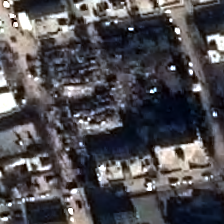

The matched document again query collapsed building at position 1 is after_2464_6496.png
./data/after_png\after_2464_6496.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.006370127}})


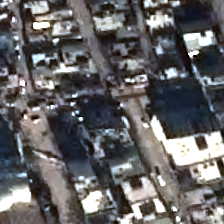

The matched document again query collapsed building at position 2 is after_4032_6944.png
./data/after_png\after_4032_6944.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0069702268}})


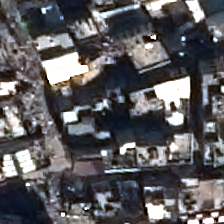

The matched document again query collapsed building at position 3 is after_2912_6720.png
./data/after_png\after_2912_6720.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.007077396}})


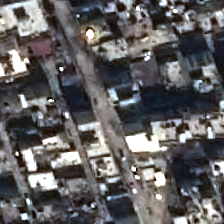

The matched document again query collapsed building at position 4 is after_3360_6496.png
./data/after_png\after_3360_6496.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0071174502}})


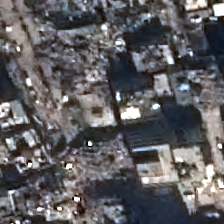

The matched document again query collapsed building at position 5 is after_4032_3808.png
./data/after_png\after_4032_3808.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.007251084}})


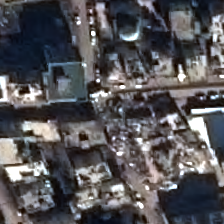

The matched document again query collapsed building at position 6 is after_2240_5376.png
./data/after_png\after_2240_5376.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0073756576}})


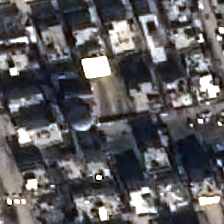

The matched document again query collapsed building at position 7 is after_2688_6720.png
./data/after_png\after_2688_6720.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0075036287}})


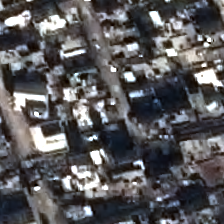

The matched document again query collapsed building at position 8 is after_3808_3360.png
./data/after_png\after_3808_3360.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0075146556}})


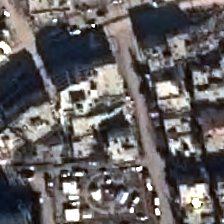

The matched document again query collapsed building at position 9 is after_2912_7616.png
./data/after_png\after_2912_7616.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008039355}})


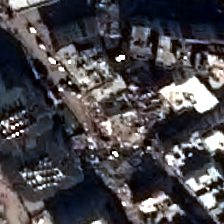

The matched document again query collapsed building at position 10 is after_1120_6496.png
./data/after_png\after_1120_6496.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008137763}})


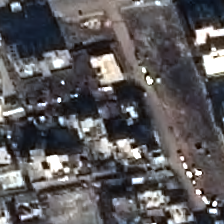

The matched document again query collapsed building at position 11 is after_3136_6048.png
./data/after_png\after_3136_6048.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.00814122}})


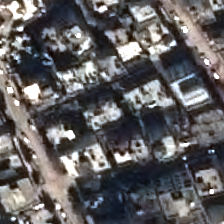

The matched document again query collapsed building at position 12 is after_4256_5152.png
./data/after_png\after_4256_5152.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008247197}})


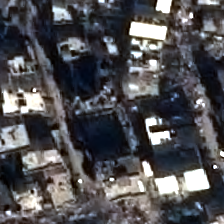

The matched document again query collapsed building at position 13 is after_2688_4928.png
./data/after_png\after_2688_4928.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008323371}})


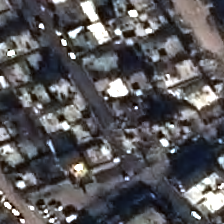

The matched document again query collapsed building at position 14 is after_4480_4256.png
./data/after_png\after_4480_4256.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008325696}})


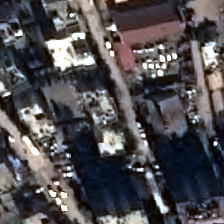

The matched document again query collapsed building at position 15 is after_2912_7168.png
./data/after_png\after_2912_7168.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008371234}})


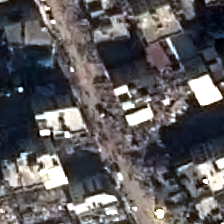

The matched document again query collapsed building at position 16 is after_2688_5600.png
./data/after_png\after_2688_5600.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.00846982}})


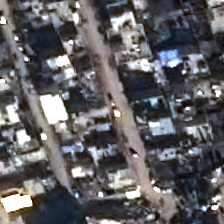

The matched document again query collapsed building at position 17 is after_3808_8512.png
./data/after_png\after_3808_8512.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.00847584}})


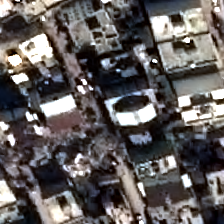

The matched document again query collapsed building at position 18 is after_3360_6944.png
./data/after_png\after_3360_6944.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0085093975}})


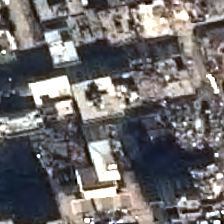

The matched document again query collapsed building at position 19 is after_2240_3808.png
./data/after_png\after_2240_3808.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008544624}})


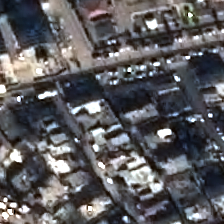

The matched document again query collapsed building at position 20 is after_4032_5152.png
./data/after_png\after_4032_5152.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008566737}})


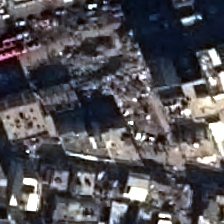

The matched document again query collapsed building at position 21 is after_2912_6272.png
./data/after_png\after_2912_6272.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008569777}})


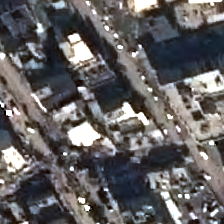

The matched document again query collapsed building at position 22 is after_3808_3136.png
./data/after_png\after_3808_3136.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008616269}})


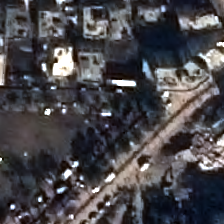

The matched document again query collapsed building at position 23 is after_4704_4032.png
./data/after_png\after_4704_4032.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008684754}})


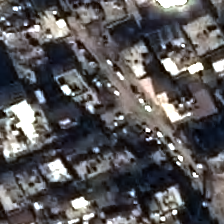

The matched document again query collapsed building at position 24 is after_1792_4704.png
./data/after_png\after_1792_4704.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008791387}})


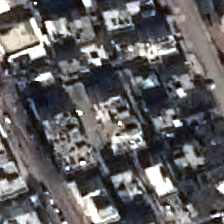

The matched document again query collapsed building at position 25 is after_1792_4256.png
./data/after_png\after_1792_4256.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008797765}})


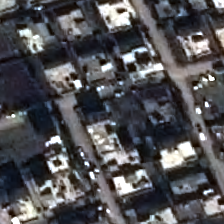

The matched document again query collapsed building at position 26 is after_3584_2912.png
./data/after_png\after_3584_2912.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008941174}})


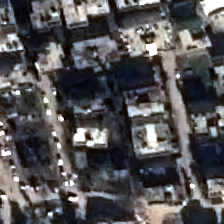

The matched document again query collapsed building at position 27 is after_896_5824.png
./data/after_png\after_896_5824.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.008972764}})


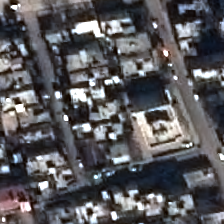

The matched document again query collapsed building at position 28 is after_4032_3584.png
./data/after_png\after_4032_3584.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009047091}})


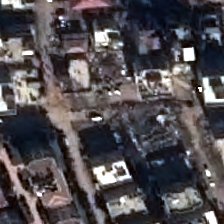

The matched document again query collapsed building at position 29 is after_4032_5600.png
./data/after_png\after_4032_5600.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009219289}})


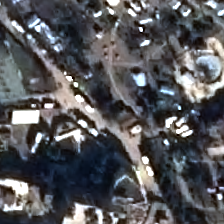

The matched document again query collapsed building at position 30 is after_2688_2240.png
./data/after_png\after_2688_2240.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009223878}})


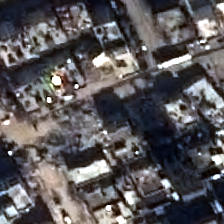

The matched document again query collapsed building at position 31 is after_3136_6272.png
./data/after_png\after_3136_6272.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.0092538595}})


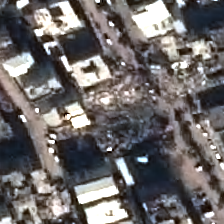

The matched document again query collapsed building at position 32 is after_3584_4928.png
./data/after_png\after_3584_4928.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009261429}})


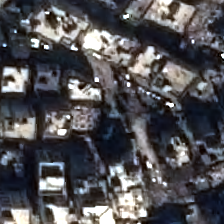

The matched document again query collapsed building at position 33 is after_1344_6272.png
./data/after_png\after_1344_6272.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009280562}})


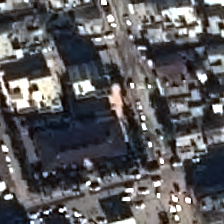

The matched document again query collapsed building at position 34 is after_4256_2016.png
./data/after_png\after_4256_2016.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009334147}})


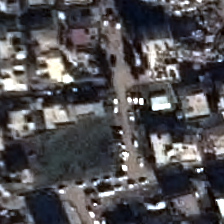

The matched document again query collapsed building at position 35 is after_2688_2464.png
./data/after_png\after_2688_2464.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.00935173}})


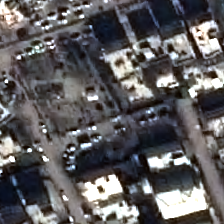

The matched document again query collapsed building at position 36 is after_3808_4704.png
./data/after_png\after_3808_4704.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009355605}})


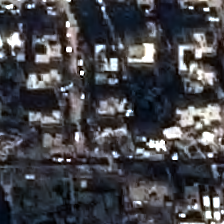

The matched document again query collapsed building at position 37 is after_2016_4256.png
./data/after_png\after_2016_4256.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009401023}})


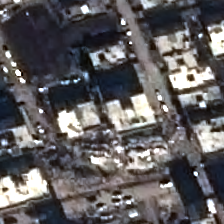

The matched document again query collapsed building at position 38 is after_2912_9408.png
./data/after_png\after_2912_9408.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009401441}})


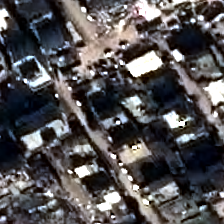

The matched document again query collapsed building at position 39 is after_4704_4704.png
./data/after_png\after_4704_4704.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009405196}})


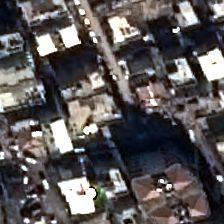

The matched document again query collapsed building at position 40 is after_2016_4704.png
./data/after_png\after_2016_4704.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009410679}})


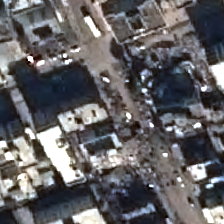

The matched document again query collapsed building at position 41 is after_2688_4704.png
./data/after_png\after_2688_4704.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009477913}})


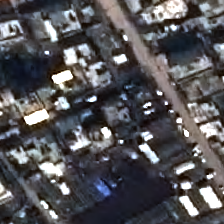

The matched document again query collapsed building at position 42 is after_1792_5600.png
./data/after_png\after_1792_5600.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009478629}})


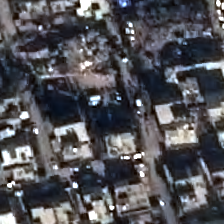

The matched document again query collapsed building at position 43 is after_4256_2464.png
./data/after_png\after_4256_2464.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009489179}})


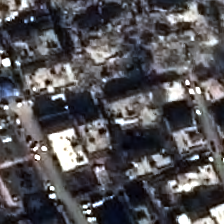

The matched document again query collapsed building at position 44 is after_3808_3808.png
./data/after_png\after_3808_3808.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009489596}})


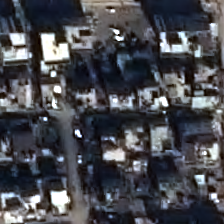

The matched document again query collapsed building at position 45 is after_2464_7168.png
./data/after_png\after_2464_7168.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009569049}})


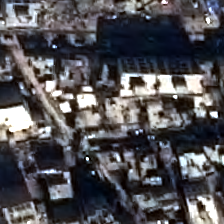

The matched document again query collapsed building at position 46 is after_2688_6496.png
./data/after_png\after_2688_6496.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009572864}})


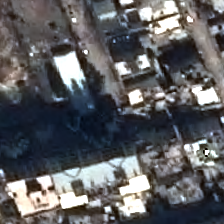

The matched document again query collapsed building at position 47 is after_3136_7392.png
./data/after_png\after_3136_7392.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.00960201}})


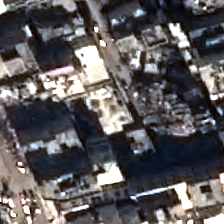

The matched document again query collapsed building at position 48 is after_3808_6496.png
./data/after_png\after_3808_6496.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009619415}})


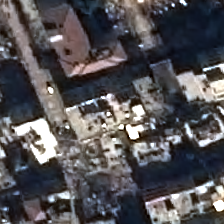

The matched document again query collapsed building at position 49 is after_2688_7392.png
./data/after_png\after_2688_7392.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.009635389}})


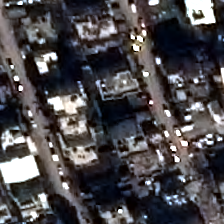

In [46]:
# image matching
query = 'collapsed building'
query_image = DocumentArray.from_files('./data/collapsed_png/after_3136_2464_247.png')

def assign_labels(d: Document):
    d.tags['finetuner_label'] = query
    print("d",d.tags['finetuner_label'])
    return d

query_image.apply(assign_labels, show_progress=True)

finetuner.encode(model=clip_image_encoder, data=query_image)
query_image.match(valid_da, metric='cosine', limit=50)
for idx, match in enumerate(query_image[0].matches):
    print(f'The matched document again query \033[1m{query}\033[0m at position \033[1m{idx}\033[0m is \033[1m{match.tags["finetuner_label"]}\033[0m')
    print(match.uri)
    print(match.scores)
    match.display()


Output()

<DocumentArray (length=10) at 2255278940272>
The matched document again query collapsed building at position 0 is after_6048_9856.png
./data/after_png\after_6048_9856.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.44597566}})


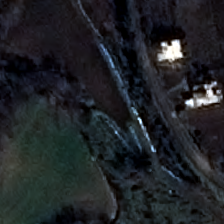

The matched document again query collapsed building at position 1 is after_5152_10304.png
./data/after_png\after_5152_10304.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.4490173}})


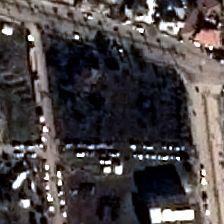

The matched document again query collapsed building at position 2 is after_0_4032.png
./data/after_png\after_0_4032.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.4496442}})


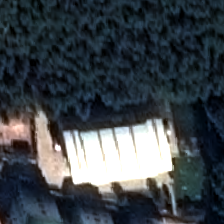

The matched document again query collapsed building at position 3 is after_6048_9632.png
./data/after_png\after_6048_9632.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45032668}})


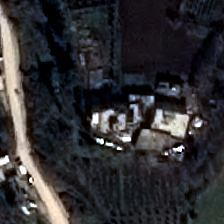

The matched document again query collapsed building at position 4 is after_5600_4480.png
./data/after_png\after_5600_4480.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45231277}})


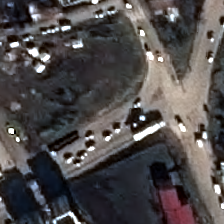

The matched document again query collapsed building at position 5 is after_5600_11200.png
./data/after_png\after_5600_11200.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45291656}})


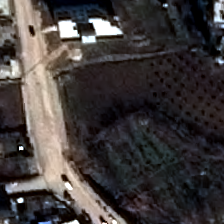

The matched document again query collapsed building at position 6 is after_5824_896.png
./data/after_png\after_5824_896.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.4537841}})


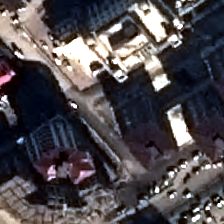

The matched document again query collapsed building at position 7 is after_5600_7616.png
./data/after_png\after_5600_7616.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45394588}})


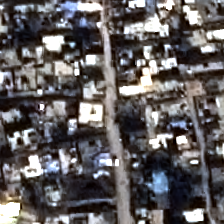

The matched document again query collapsed building at position 8 is after_5824_1120.png
./data/after_png\after_5824_1120.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45462555}})


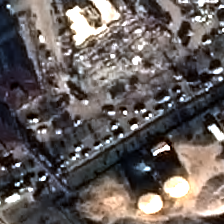

The matched document again query collapsed building at position 9 is after_4704_10528.png
./data/after_png\after_4704_10528.png
defaultdict(<class 'docarray.score.NamedScore'>, {'cosine': {'value': 0.45476705}})


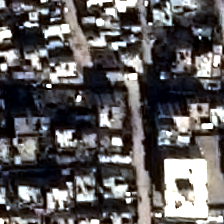

In [42]:
# Text search
# embed a user query, in this case, valid_da
query = 'collapsed building'
query_docs = DocumentArray([Document(content=query)])

finetuner.encode(model=clip_text_encoder, data=query_docs)
# find top 5 matches
query_docs.match(valid_da, metric='cosine', limit=10)
print(query_docs[0].matches)
# plot matches
for idx, match in enumerate(query_docs[0].matches):
    print(f'The matched document again query \033[1m{query}\033[0m at position \033[1m{idx}\033[0m is \033[1m{match.tags["finetuner_label"]}\033[0m')
    print(match.uri)
    print(match.scores)
    match.display()